# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display
from matplotlib.ticker import FuncFormatter

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

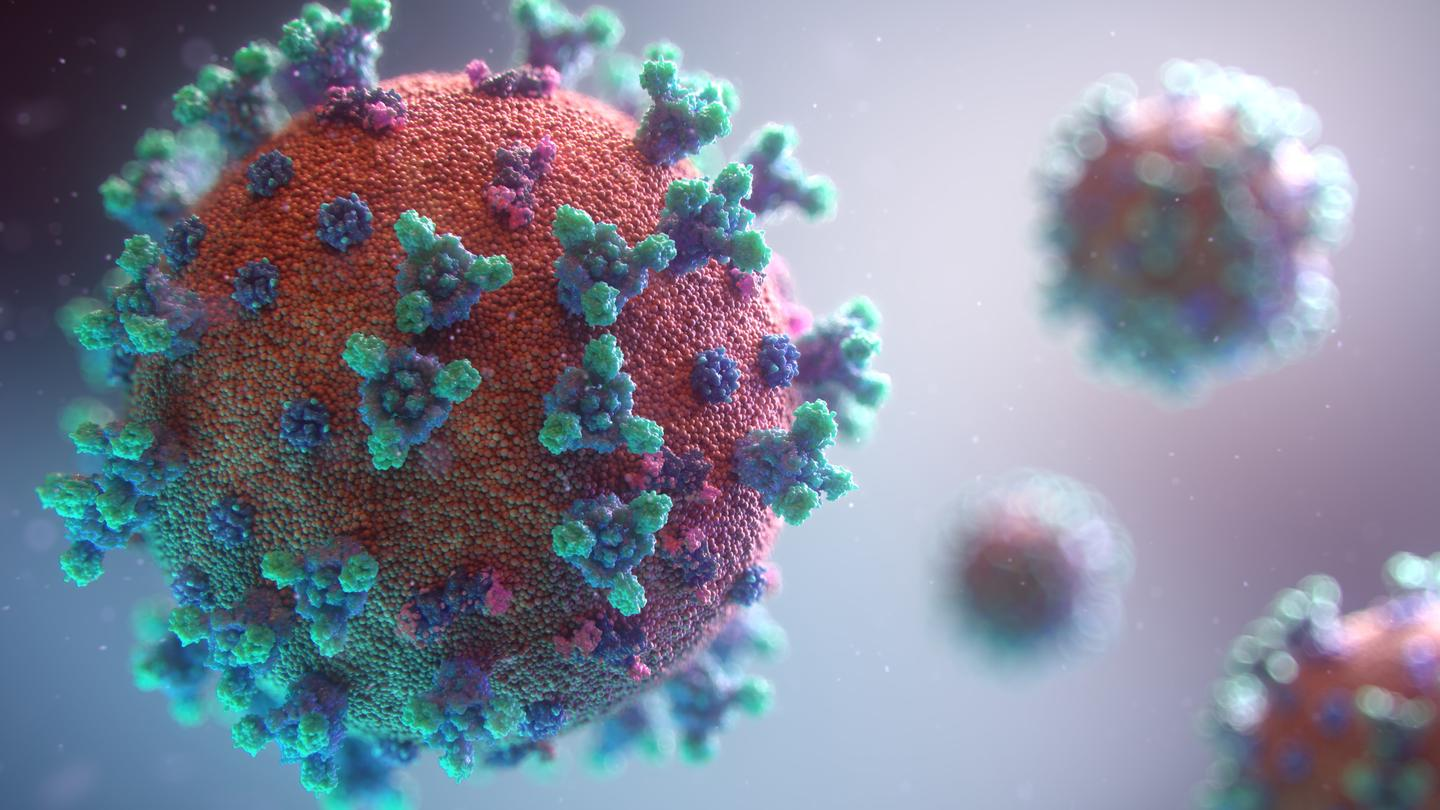

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(222373, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222373 entries, 0 to 222372
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    222373 non-null  object 
 1   continent                                   209596 non-null  object 
 2   location                                    222373 non-null  object 
 3   date                                        222373 non-null  object 
 4   total_cases                                 213225 non-null  float64
 5   new_cases                                   212950 non-null  float64
 6   new_cases_smoothed                          211754 non-null  float64
 7   total_deaths                                194089 non-null  float64
 8   new_deaths                                  194026 non-null  float64
 9   new_deaths_smoothed                         192846 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1012
MEX         1012
THA         1009
TWN          997
MAC          991
OWID_WRL     991
OWID_UMC     991
KOR          991
CHN          991
USA          991
Name: iso_code, dtype: int64

# Helper Functions

In [10]:
# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)




def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, data=data)


In [11]:
df['continent'].value_counts()                                                                            

Africa           51353
Europe           48053
Asia             47859
North America    34170
Oceania          15823
South America    12338
Name: continent, dtype: int64

[Text(0.5, 1.0, 'Countplot of Continents')]

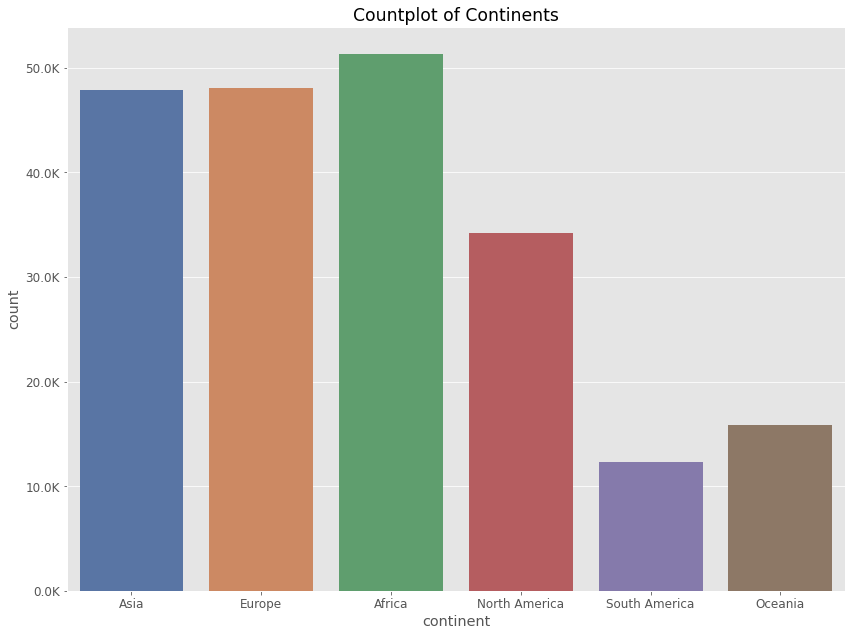

In [12]:
fig, ax = plt.subplots()

cntplot(data=df, x='continent', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Continents')

In [13]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.075
South America    0.059
Name: continent, dtype: float64

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each continent')]

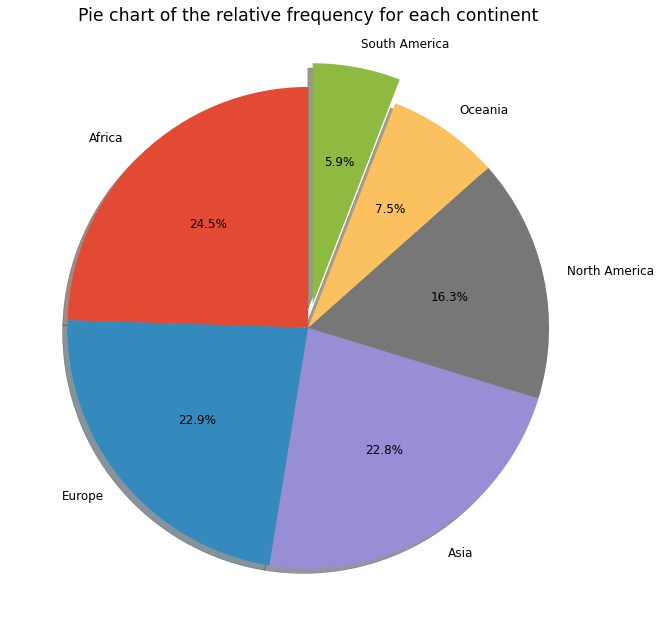

In [14]:
fig, ax = plt.subplots()

plot_pie(
  x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0, 0, 0.1]
)

ax.set(title='Pie chart of the relative frequency for each continent')

In [15]:
df['location'].value_counts().head(10)

Argentina              1012
Mexico                 1012
Thailand               1009
Taiwan                  997
Macao                   991
World                   991
Upper middle income     991
South Korea             991
China                   991
United States           991
Name: location, dtype: int64

In [16]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    222373    209596     222373      222373           106788
unique      244         6        244        1012                4
top         ARG    Africa  Argentina  2021-09-19  tests performed
freq       1012     51353       1012         243            80099

In [17]:
df['tests_units'].value_counts()

tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

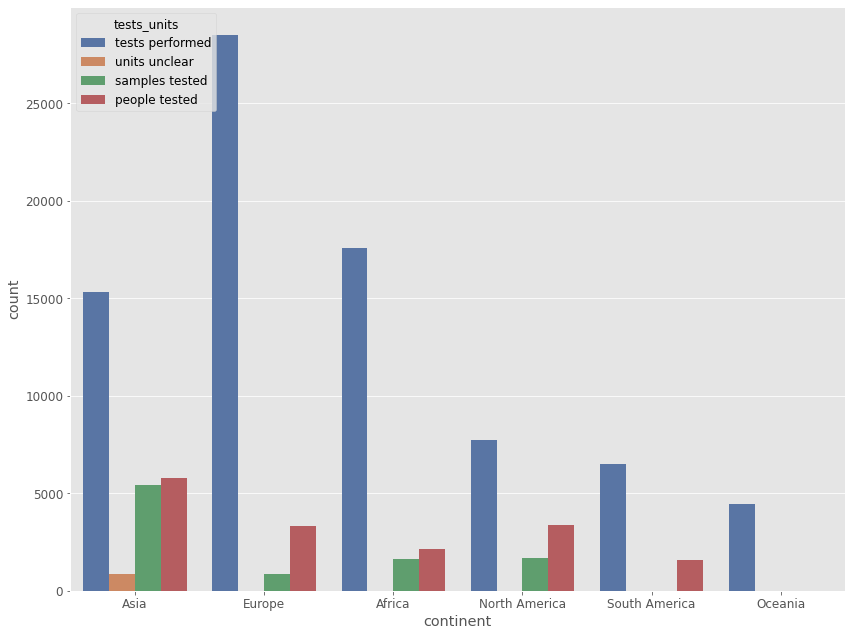

In [18]:
cntplot(data=df, orient='v', palette='deep', dodge=True, x='continent', hue='tests_units')

In [19]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13225e+05  2.12950e+05         2.11754e+05   1.94089e+05   
mean   4.31821e+06  1.24358e+04         1.24708e+04   7.31494e+04   
std    2.70375e+07  8.57547e+04         8.38249e+04   3.76641e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.14000e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.75430e+04  5.60000e+01         9.61430e+01   1.14800e+03   
75%    5.11231e+05  9.72000e+02         1.13786e+03   9.66100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194026.00000         192846.00000             212250.00000   
mean      140.31871            141.03305              58259.67384   
std       735.93137            721.48291             103877.58442   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1041.16525   
50%         1.00000              1.57100               9873.69350   
75%        14.00000             16.00000              70159.72325   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211975.00000                    210784.00000   
mean               190.15507                       190.28327   
std               1055.21221                       668.86966   
min                  0.00000                         0.00000   
25%                  0.00000                         1.37600   
50%                  7.88100                        19.67900   
75%                 98.65200                       136.37525   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193127.00000            193064.00000   
mean                  681.24142                 1.42256   
std                   967.56504                 5.12771   
min                     0.00000                 0.00000   
25%                    28.80500                 0.00000   
50%                   206.31300                 0.03600   
75%                  1009.78450                 0.99500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191889.00000       166717.00000   28244.00000   
mean                           1.42205            0.94681     831.13387   
std                            3.35727            0.38405    2470.02943   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.35800            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28244.00000    31011.00000                31011.00000   
mean                   20.93745     4151.87704                  156.15891   
std                    26.18430    10772.57043                  191.36381   
min                     0.00000        0.00000                    0.00000   
25%                     3.77000      172.00000                   32.84700   
50%                    10.47700      808.00000                   87.99100   
75%                    29.00500     3175.50000                  198.68550   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7319.00000                         7319.00000   
mean               421.40743                           13.00796   
std                580.46505                           15.09171   
min             

In [20]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
222368 2022-10-04
222369 2022-10-05
222370 2022-10-06
222371 2022-10-07
222372 2022-10-08

[222373 rows x 1 columns]

In [21]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
222368  2022         10    4    Tuesday
222369  2022         10    5  Wednesday
222370  2022         10    6   Thursday
222371  2022         10    7     Friday
222372  2022         10    8   Saturday

[222373 rows x 4 columns]

In [22]:
# assign month names
df['month_name'] = df['month_num'].map(
                                       {
                                         1: 'Jan',
                                         2: 'Feb',
                                         3: 'Mar',
                                         4: 'Apr',
                                         5: 'May',
                                         6: 'June',
                                         7: 'July',
                                         8: 'Aug',
                                         9: 'Sep',
                                         10: 'Oct',
                                         11: 'Nov',
                                         12: 'Dec'
                                       }
                                    )

df[['month_num', 'month_name']].value_counts(ascending=False)

month_num  month_name
7          July          21774
5          May           21719
8          Aug           21718
6          June          21091
9          Sep           20984
4          Apr           20770
3          Mar           19631
10         Oct           16360
1          Jan           14919
2          Feb           14764
12         Dec           14543
11         Nov           14100
dtype: int64

<AxesSubplot:xlabel='month_name', ylabel='count'>

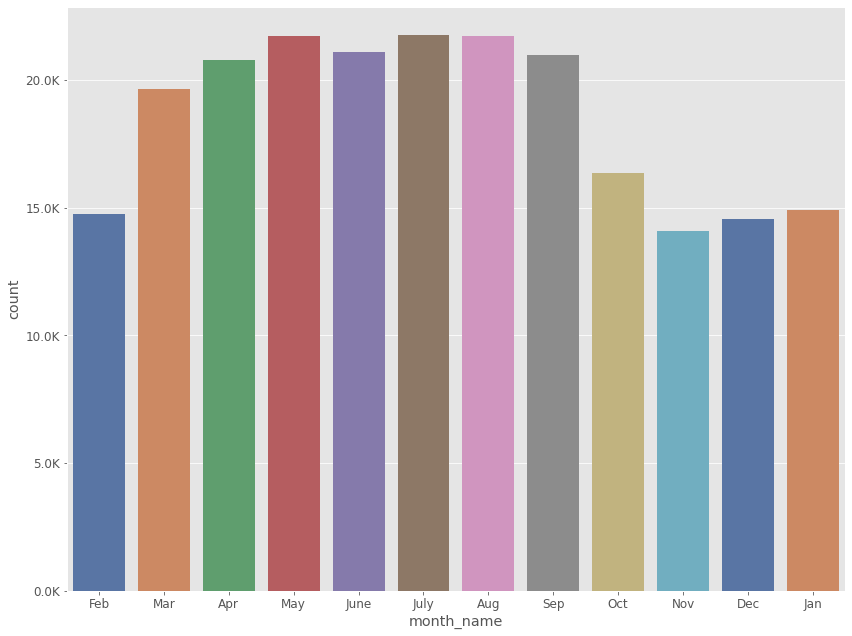

In [23]:
fig, ax = plt.subplots()

cntplot(data=df, x='month_name', palette='deep', orient='v', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))

In [24]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

# Missing Data Exploration

In [25]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12777
location                                           0
date                                               0
total_cases                                     9148
new_cases                                       9423
new_cases_smoothed                             10619
total_deaths                                   28284
new_deaths                                     28347
new_deaths_smoothed                            29527
total_cases_per_million                        10123
new_cases_per_million                          10398
new_cases_smoothed_per_million                 11589
total_deaths_per_million                       29246
new_deaths_per_million                         29309
new_deaths_smoothed_per_million                30484
reproduction_rate                              55656
icu_patients                                  194129
icu_patients_per_million                      

<AxesSubplot:>

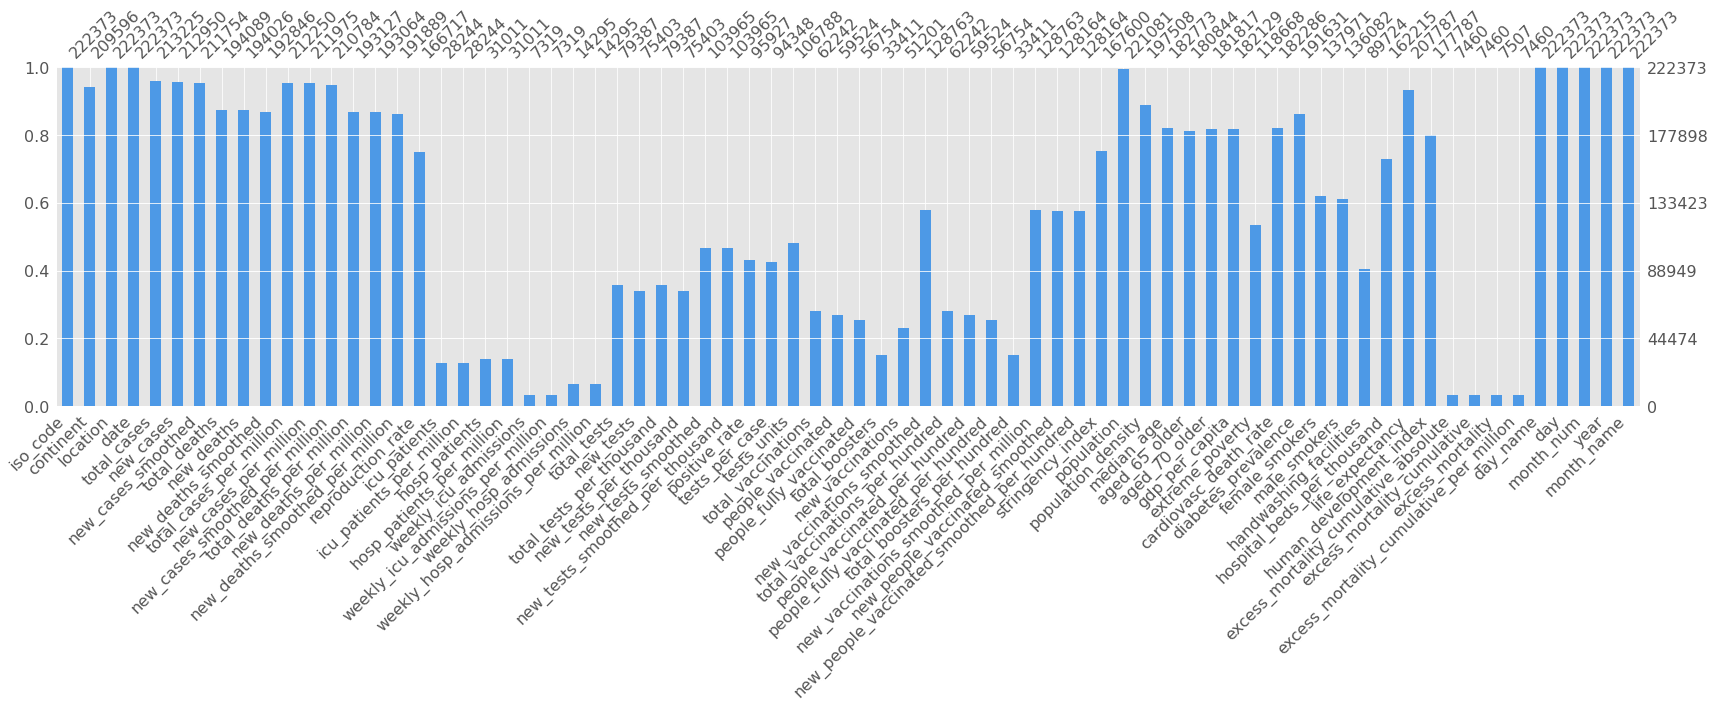

In [26]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

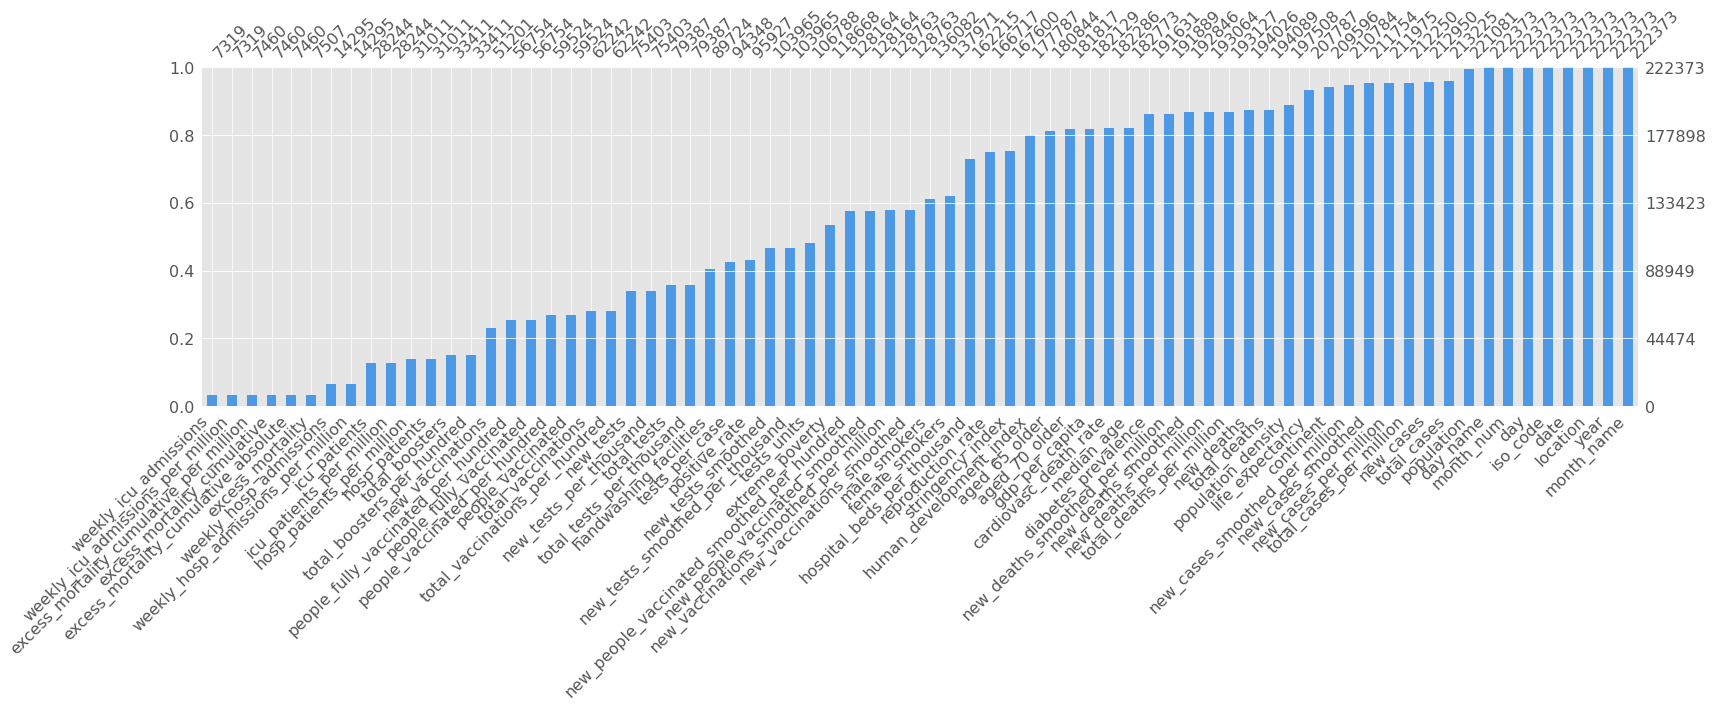

In [27]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [28]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222368      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
222369      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   
222370      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222371      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
222372      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222368              27.429        5603.0         0.0                0.571   
222369              22.714        5603.0         0.0                0.143   
222370              35.143        5604.0         1.0                0.286   
222371              27.143        5604.0         0.0                0.286   
222372              27.143        5604.0         0.0                0.286   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222368                16104.518                  1.876   
222369                16104.518                  0.000   
222370                16109.958                  5.440   
222371                16109.958                  0.000   
222372                16109.958                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222368                           1.715                   350.329   
222369                           1.420                   350.329   
222370                           2.197                   350.392   
222371                           1.697                   350.392   
222372                           1.697                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222368                   0.000                            0.036   
222369                   0.000                            0.009   
222370                   0.063          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [29]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [30]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
222368      ZWE     Zimbabwe 2022-10-04    Tuesday    4         10  2022   
222369      ZWE     Zimbabwe 2022-10-05  Wednesday    5         10  2022   
222370      ZWE     Zimbabwe 2022-10-06   Thursday    6         10  2022   
222371      ZWE     Zimbabwe 2022-10-07     Friday    7         10  2022   
222372      ZWE     Zimbabwe 2022-10-08   Saturday    8         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
222368        Oct  
222369        Oct  
222370        Oct  
222371        Oct  
222372        Oct  

[222373 rows x 8 columns]

Filling the missing data

In [31]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
222368      ZWE    Africa     Zimbabwe 2022-10-04     257568.0       30.0   
222369      ZWE    Africa     Zimbabwe 2022-10-05     257568.0        0.0   
222370      ZWE    Africa     Zimbabwe 2022-10-06     257655.0       87.0   
222371      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
222372      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
222368              27.429        5603.0         0.0                0.571   
222369              22.714        5603.0         0.0                0.143   
222370              35.143        5604.0         1.0                0.286   
222371              27.143        5604.0         0.0                0.286   
222372              27.143        5604.0         0.0                0.286   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
222368                16104.518                  1.876   
222369                16104.518                  0.000   
222370                16109.958                  5.440   
222371                16109.958                  0.000   
222372                16109.958                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
222368                           1.715                   350.329   
222369                           1.420                   350.329   
222370                           2.197                   350.392   
222371                           1.697                   350.392   
222372                           1.697                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
222368                   0.000                            0.036   
222369                   0.000                            0.009   
222370                   0.063          

Fill with Mean / Median of Group

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08221e+05  2.08221e+05         2.08221e+05   2.05064e+05   
mean   4.24981e+06  1.21217e+04         1.21542e+04   6.84032e+04   
std    2.73282e+07  8.63698e+04         8.43555e+04   3.67353e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.43000e+03  0.00000e+00         5.42900e+00   7.80000e+01   
50%    3.98500e+04  4.60000e+01         8.02860e+01   7.89000e+02   
75%    4.17526e+05  8.17000e+02         9.35857e+02   7.35100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205064.00000         205064.00000             207246.00000   
mean      131.25678            131.79837              54795.73699   
std       716.62279            701.80395             100089.49205   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01199                941.58375   
50%         0.60156              1.00000               8702.88750   
75%        11.00000             12.00000              65248.69350   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207246.00000                    207246.00000   
mean               182.47417                       182.10416   
std               1053.11799                       658.56245   
min                  0.00000                         0.00000   
25%                  0.00000                         1.24800   
50%                  6.88800                        17.40400   
75%                 89.31500                       126.52750   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204089.00000            204089.00000   
mean                  631.37777                 1.40392   
std                   926.23211                 4.97007   
min                     0.00000                 0.00000   
25%                    29.06900                 0.00000   
50%                   189.75300                 0.07100   
75%                   922.85400                 1.08200   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204089.00000       174252.00000   29851.00000   
mean                           1.39358            0.93480     762.56835   
std                            3.24238            0.37624    2514.17695   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      25.00000   
50%                            0.22300            0.96000      90.00000   
75%                            1.39532            1.13000     500.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29851.00000    31881.00000                31881.00000   
mean                   18.34400     3973.15387                  149.19953   
std                    21.81192    10757.69087                  181.64698   
min                     0.00000        0.00000                    0.00000   
25%                     4.51450      172.00000                   39.82000   
50%                     9.56000      796.36611                   85.02100   
75%                    27.71000     2877.00000                  192.22100   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10104.00000                        10104.00000   
mean               167.40820                           11.26149   
std                291.45865                            8.60348   
min             

In [33]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08221e+05  2.08221e+05         2.08221e+05   2.05064e+05   
mean   4.24907e+06  1.21145e+04         1.21263e+04   6.84930e+04   
std    2.73279e+07  8.63700e+04         8.43145e+04   3.67493e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.53900e+03  0.00000e+00         5.14300e+00   7.70000e+01   
50%    3.98270e+04  4.50000e+01         7.94290e+01   7.91000e+02   
75%    4.15468e+05  8.09000e+02         9.20286e+02   7.34300e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205064.00000         205064.00000             207246.00000   
mean      130.77209            131.29225              54998.28433   
std       716.53859            701.65313             100639.39835   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                935.05450   
50%         0.00000              1.00000               8581.54350   
75%        10.00000             11.42900              65194.31750   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207246.00000                    207246.00000   
mean               177.67619                       176.65586   
std               1050.44145                       653.84549   
min                  0.00000                         0.00000   
25%                  0.00000                         1.15100   
50%                  6.35300                        16.64000   
75%                 86.25175                       122.45100   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204089.00000            204089.00000   
mean                  636.80758                 1.27370   
std                   929.91015                 4.95727   
min                     0.00000                 0.00000   
25%                    28.59900                 0.00000   
50%                   191.97300                 0.00000   
75%                   925.55200                 0.75400   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204089.00000       174252.00000   29851.00000   
mean                           1.27984            0.92982     736.53729   
std                            3.22188            0.38036    2472.39994   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      24.00000   
50%                            0.14100            0.96000      89.00000   
75%                            1.16200            1.13000     453.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29851.00000    31881.00000                31881.00000   
mean                   17.55213     3748.99470                  142.98250   
std                    22.02350    10464.93533                  180.97717   
min                     0.00000        0.00000                    0.00000   
25%                     3.69300      170.00000                   39.19700   
50%                     9.26700      762.50000                   76.14350   
75%                    23.43700     2817.00000                  169.72600   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10104.00000                        10104.00000   
mean               134.99673                            7.09393   
std                260.48372                            3.60354   
min             

In [34]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13225e+05  2.12950e+05         2.11754e+05   1.94089e+05   
mean   4.31821e+06  1.24358e+04         1.24708e+04   7.31494e+04   
std    2.70375e+07  8.57547e+04         8.38249e+04   3.76641e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.14000e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.75430e+04  5.60000e+01         9.61430e+01   1.14800e+03   
75%    5.11231e+05  9.72000e+02         1.13786e+03   9.66100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194026.00000         192846.00000             212250.00000   
mean      140.31871            141.03305              58259.67384   
std       735.93137            721.48291             103877.58442   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1041.16525   
50%         1.00000              1.57100               9873.69350   
75%        14.00000             16.00000              70159.72325   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211975.00000                    210784.00000   
mean               190.15507                       190.28327   
std               1055.21221                       668.86966   
min                  0.00000                         0.00000   
25%                  0.00000                         1.37600   
50%                  7.88100                        19.67900   
75%                 98.65200                       136.37525   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193127.00000            193064.00000   
mean                  681.24142                 1.42256   
std                   967.56504                 5.12771   
min                     0.00000                 0.00000   
25%                    28.80500                 0.00000   
50%                   206.31300                 0.03600   
75%                  1009.78450                 0.99500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191889.00000       166717.00000   28244.00000   
mean                           1.42205            0.94681     831.13387   
std                            3.35727            0.38405    2470.02943   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.35800            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28244.00000    31011.00000                31011.00000   
mean                   20.93745     4151.87704                  156.15891   
std                    26.18430    10772.57043                  191.36381   
min                     0.00000        0.00000                    0.00000   
25%                     3.77000      172.00000                   32.84700   
50%                    10.47700      808.00000                   87.99100   
75%                    29.00500     3175.50000                  198.68550   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7319.00000                         7319.00000   
mean               421.40743                           13.00796   
std                580.46505                           15.09171   
min             

Forward Fill & Back Fill within Groups

In [35]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.05914e+05  2.05914e+05         2.04758e+05   1.86813e+05   
mean   4.29331e+06  1.22507e+04         1.22836e+04   7.40339e+04   
std    2.74767e+07  8.68442e+04         8.49566e+04   3.83745e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.73300e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.14210e+04  4.80000e+01         8.24290e+01   9.82000e+02   
75%    4.22857e+05  8.27000e+02         9.38250e+02   8.46700e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  186991.00000          185871.0000             204939.00000   
mean      142.74774             143.4299              54816.84416   
std       749.12664             734.4937             100344.37875   
min         0.00000               0.0000                  0.00100   
25%         0.00000               0.0000                956.64900   
50%         1.00000               1.2860               8696.75600   
75%        13.00000              13.7140              64955.78900   
max     17737.00000           14858.1430             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           204939.00000                    203788.00000   
mean               180.31210                       179.16138   
std               1058.41736                       659.78279   
min                  0.00000                         0.00000   
25%                  0.00000                         1.23775   
50%                  6.69600                        17.06550   
75%                 87.95100                       123.53600   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              185851.00000            186029.00000   
mean                  650.84097                 1.39030   
std                   954.47804                 5.33486   
min                     0.00000                 0.00000   
25%                    27.35450                 0.00000   
50%                   186.35900                 0.02300   
75%                   949.59000                 0.90500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     184914.00000       160782.00000   26559.00000   
mean                           1.38213            0.93972     693.14639   
std                            3.36768            0.38831    2497.73781   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      20.00000   
50%                            0.18500            0.96000      84.00000   
75%                            1.28000            1.15000     367.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26559.00000    28688.00000                28688.00000   
mean                   17.30351     3663.43335                  148.64947   
std                    23.09130    10776.84603                  190.96588   
min                     0.00000        0.00000                    0.00000   
25%                     2.77100      135.00000                   30.16600   
50%                     7.66500      673.50000                   82.90000   
75%                    22.04750     2468.25000                  178.21700   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6744.00000                         6744.00000   
mean                53.48339                           12.22974   
std                116.48315                           20.48779   
min             

In [36]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08221e+05  2.08100e+05         2.08100e+05   2.05064e+05   
mean   4.24575e+06  1.21175e+04         1.20849e+04   6.74449e+04   
std    2.73277e+07  8.63954e+04         8.42856e+04   3.66876e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.25000e+03  0.00000e+00         4.71400e+00   4.40000e+01   
50%    3.89690e+04  4.40000e+01         7.57140e+01   6.67000e+02   
75%    4.12393e+05  8.01000e+02         9.00714e+02   6.87500e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205011.00000         205011.00000             207246.00000   
mean      130.32238            130.06802              54207.47275   
std       716.60810            700.60014              99949.46697   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                904.50100   
50%         1.00000              0.85700               8213.98600   
75%        10.00000             10.71400              63915.47450   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207125.00000                    207125.00000   
mean               178.46342                       176.21843   
std               1050.73822                       654.16307   
min                  0.00000                         0.00000   
25%                  0.00000                         1.14500   
50%                  6.65900                        16.32300   
75%                 88.41200                       119.79400   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204089.00000            204036.00000   
mean                  594.35203                 2.93650   
std                   928.57623                13.02167   
min                     0.00000                 0.00000   
25%                    17.40100                 0.00000   
50%                   136.26200                 0.06400   
75%                   840.27000                 1.25600   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204036.00000       172945.00000   29120.00000   
mean                           1.58901            0.97878     712.71830   
std                            3.84949            0.44488    2481.37818   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20200            0.97000      88.00000   
75%                            1.43800            1.18000     369.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29120.00000    30703.00000                30703.00000   
mean                   17.39628     3713.58558                  139.02359   
std                    22.73148    10677.84582                  186.75148   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      151.00000                   28.95550   
50%                     8.10100      727.00000                   71.03000   
75%                    23.20475     2407.00000                  165.38000   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9664.00000                         9664.00000   
mean               137.21658                           11.41547   
std                324.15565                           17.73321   
min             

In [37]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13225e+05  2.12950e+05         2.11754e+05   1.94089e+05   
mean   4.31821e+06  1.24358e+04         1.24708e+04   7.31494e+04   
std    2.70375e+07  8.57547e+04         8.38249e+04   3.76641e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.14000e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.75430e+04  5.60000e+01         9.61430e+01   1.14800e+03   
75%    5.11231e+05  9.72000e+02         1.13786e+03   9.66100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194026.00000         192846.00000             212250.00000   
mean      140.31871            141.03305              58259.67384   
std       735.93137            721.48291             103877.58442   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1041.16525   
50%         1.00000              1.57100               9873.69350   
75%        14.00000             16.00000              70159.72325   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211975.00000                    210784.00000   
mean               190.15507                       190.28327   
std               1055.21221                       668.86966   
min                  0.00000                         0.00000   
25%                  0.00000                         1.37600   
50%                  7.88100                        19.67900   
75%                 98.65200                       136.37525   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193127.00000            193064.00000   
mean                  681.24142                 1.42256   
std                   967.56504                 5.12771   
min                     0.00000                 0.00000   
25%                    28.80500                 0.00000   
50%                   206.31300                 0.03600   
75%                  1009.78450                 0.99500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191889.00000       166717.00000   28244.00000   
mean                           1.42205            0.94681     831.13387   
std                            3.35727            0.38405    2470.02943   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.35800            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28244.00000    31011.00000                31011.00000   
mean                   20.93745     4151.87704                  156.15891   
std                    26.18430    10772.57043                  191.36381   
min                     0.00000        0.00000                    0.00000   
25%                     3.77000      172.00000                   32.84700   
50%                    10.47700      808.00000                   87.99100   
75%                    29.00500     3175.50000                  198.68550   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7319.00000                         7319.00000   
mean               421.40743                           13.00796   
std                580.46505                           15.09171   
min             

Combining FFill and BFill

In [38]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15054e+05  2.15054e+05         2.15054e+05   2.15054e+05   
mean   4.11085e+06  1.17301e+04         1.16968e+04   6.43120e+04   
std    2.69004e+07  8.50146e+04         8.29393e+04   3.58534e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.29100e+03  0.00000e+00         3.57100e+00   2.60000e+01   
50%    3.42805e+04  3.60000e+01         6.71430e+01   5.01000e+02   
75%    3.79596e+05  7.35000e+02         8.35535e+02   6.10100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  215054.00000         215054.00000             215054.00000   
mean      124.28627            124.05308              52239.60424   
std       700.16438            684.59065              98640.64619   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                671.21900   
50%         1.00000              0.71400               6729.49700   
75%         8.00000              9.57100              60949.15725   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215054.00000                    215054.00000   
mean               172.88415                       169.99365   
std               1033.85031                       643.45676   
min                  0.00000                         0.00000   
25%                  0.00000                         0.79800   
50%                  5.47500                        13.93150   
75%                 83.35800                       111.91200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              215054.00000            215054.00000   
mean                  564.22547                 2.96729   
std                   913.88502                12.85261   
min                     0.00000                 0.00000   
25%                    12.74200                 0.00000   
50%                   109.42350                 0.07000   
75%                   761.79150                 1.19500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     215054.00000       215054.00000  203301.00000   
mean                           1.55584            1.08063     283.32968   
std                            3.78982            0.65077    1068.67288   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.18100            1.00000      10.00000   
75%                            1.38600            1.25000      88.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              203301.00000   203301.00000               203301.00000   
mean                    7.90593     1367.66996                   44.32446   
std                    14.03944     4682.63022                   89.87339   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200       96.00000                   15.64200   
75%                     9.18900      636.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           181223.00000                       181223.00000   
mean               217.77161                           10.54875   
std                581.26631                           11.71258   
min             

In [39]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13225e+05  2.12950e+05         2.11754e+05   1.94089e+05   
mean   4.31821e+06  1.24358e+04         1.24708e+04   7.31494e+04   
std    2.70375e+07  8.57547e+04         8.38249e+04   3.76641e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.14000e+03  0.00000e+00         6.28600e+00   1.11000e+02   
50%    4.75430e+04  5.60000e+01         9.61430e+01   1.14800e+03   
75%    5.11231e+05  9.72000e+02         1.13786e+03   9.66100e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194026.00000         192846.00000             212250.00000   
mean      140.31871            141.03305              58259.67384   
std       735.93137            721.48291             103877.58442   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1041.16525   
50%         1.00000              1.57100               9873.69350   
75%        14.00000             16.00000              70159.72325   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           211975.00000                    210784.00000   
mean               190.15507                       190.28327   
std               1055.21221                       668.86966   
min                  0.00000                         0.00000   
25%                  0.00000                         1.37600   
50%                  7.88100                        19.67900   
75%                 98.65200                       136.37525   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193127.00000            193064.00000   
mean                  681.24142                 1.42256   
std                   967.56504                 5.12771   
min                     0.00000                 0.00000   
25%                    28.80500                 0.00000   
50%                   206.31300                 0.03600   
75%                  1009.78450                 0.99500   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     191889.00000       166717.00000   28244.00000   
mean                           1.42205            0.94681     831.13387   
std                            3.35727            0.38405    2470.02943   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21200            0.97000     151.00000   
75%                            1.35800            1.15000     577.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28244.00000    31011.00000                31011.00000   
mean                   20.93745     4151.87704                  156.15891   
std                    26.18430    10772.57043                  191.36381   
min                     0.00000        0.00000                    0.00000   
25%                     3.77000      172.00000                   32.84700   
50%                    10.47700      808.00000                   87.99100   
75%                    29.00500     3175.50000                  198.68550   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7319.00000                         7319.00000   
mean               421.40743                           13.00796   
std                580.46505                           15.09171   
min             

In [40]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby(['location']).transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           210.09252    4546.13656      8.3914               8.4349   
1           210.09252    4546.13656      8.3914               8.4349   
2           210.09252    4546.13656      8.3914               8.4349   
3           210.09252    4546.13656      8.3914               8.4349   
4           210.09252    4546.13656      8.3914               8.4349   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23929                 113.37152   
1                         5.23929                 113.37152   
2                         5.23929                 113.37152   
3                         5.23929                 113.37152   
4                         5.23929                 113.37152   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.20933                           0.2104            1.06365   
1                 0.20933                           0.2104            1.06365   
2                 0.20933                           0.2104            1.06365   
3                 0.20933                           0.2104            1.06365   
4                 0.20933                           0.2104            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

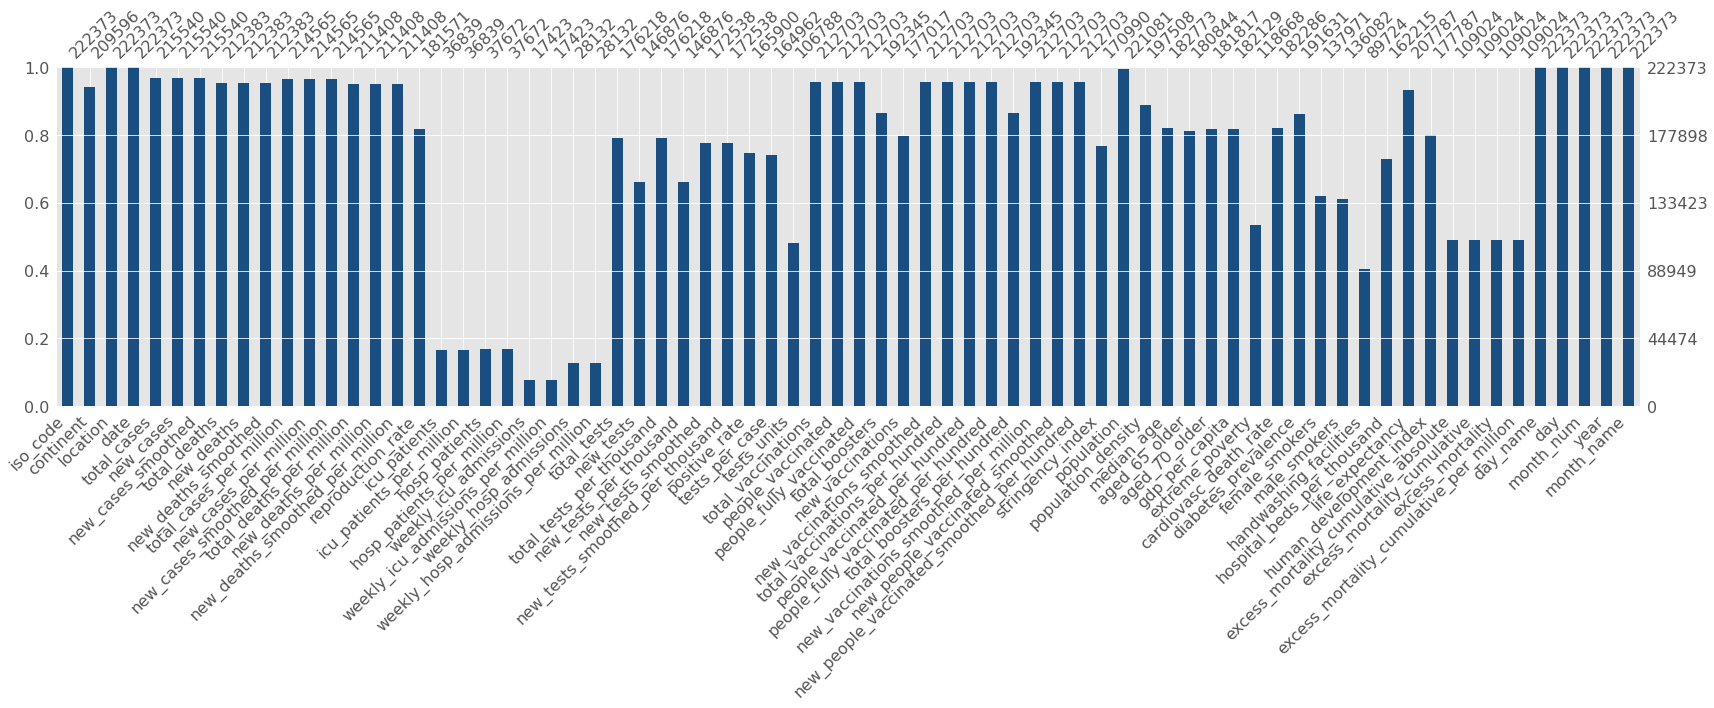

In [41]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

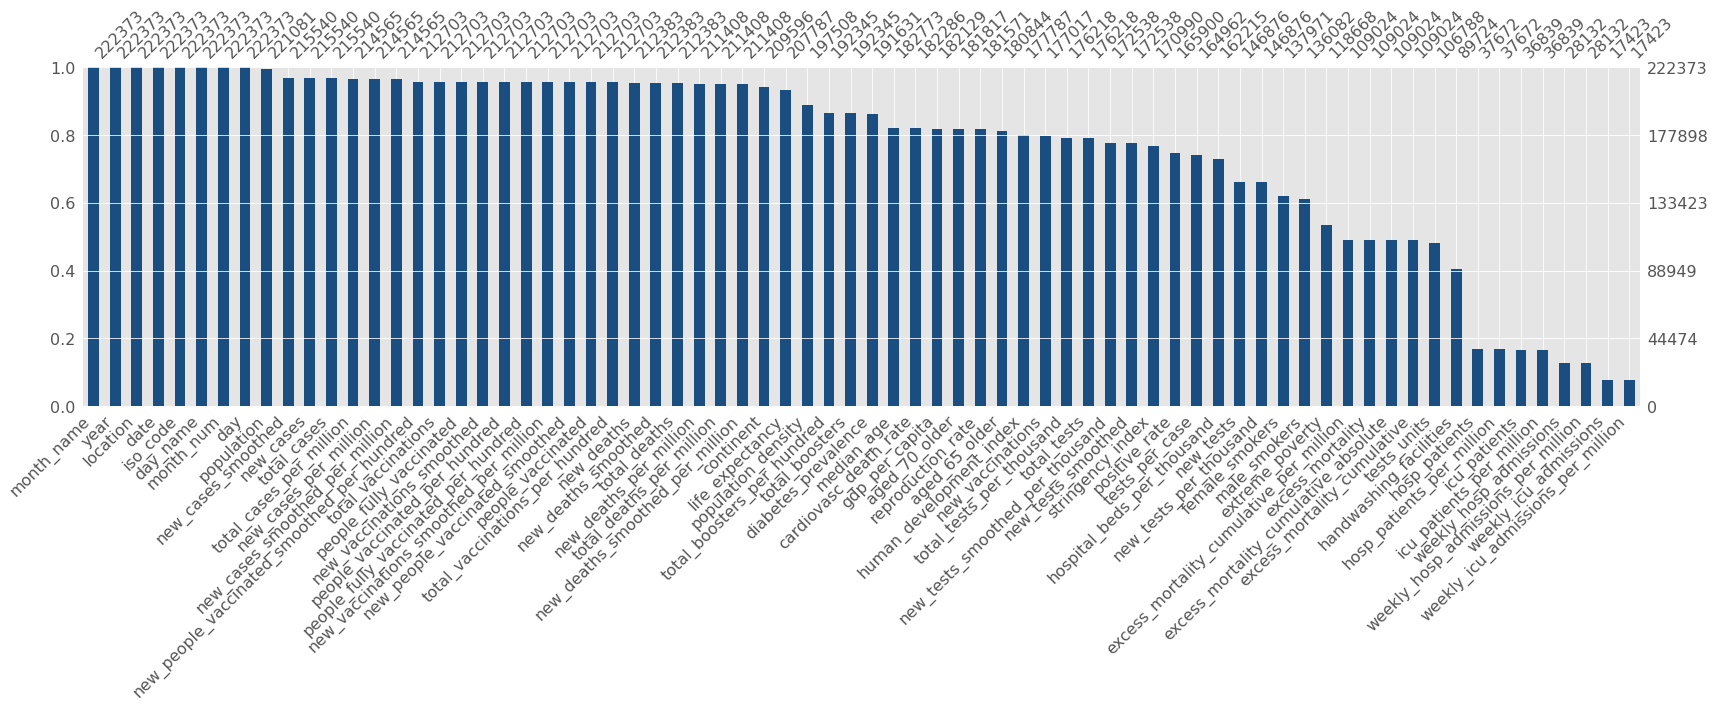

In [42]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [43]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15540e+05  2.15540e+05         2.15540e+05   2.12383e+05   
mean   4.27578e+06  1.23017e+04         1.23313e+04   6.77763e+04   
std    2.68961e+07  8.52481e+04         8.31937e+04   3.61109e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.86400e+03  0.00000e+00         6.14300e+00   8.60000e+01   
50%    4.58550e+04  5.40000e+01         9.37140e+01   8.63000e+02   
75%    5.03611e+05  9.63000e+02         1.13118e+03   8.52900e+03   
max    6.21148e+08  4.08174e+06         3.43627e+06   6.55668e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  212383.00000         212383.00000             214565.00000   
mean      129.30885            129.85066              58204.85132   
std       704.65118            689.98309             103602.66077   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.03224               1009.67200   
50%         1.00000              1.28600               9882.84200   
75%        12.00000             13.85700              70120.95800   
max     17737.00000          14858.14300             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           214565.00000                    214565.00000   
mean               192.78845                       193.06496   
std               1051.55213                       667.71913   
min                  0.00000                         0.00000   
25%                  0.00000                         1.39100   
50%                  8.14000                        20.08100   
75%                100.78200                       140.09200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              211408.00000            211408.00000   
mean                  659.97511                 1.43713   
std                   940.14878                 4.92700   
min                     0.00000                 0.00000   
25%                    31.40800                 0.00000   
50%                   206.32813                 0.08800   
75%                   975.82560                 1.16900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     211408.00000       181571.00000   36839.00000   
mean                           1.43072            0.93960     790.61706   
std                            3.24019            0.37395    2317.97502   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.76000      30.00000   
50%                            0.24300            0.96000     141.42894   
75%                            1.48500            1.13000     651.43956   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36839.00000    37672.00000                37672.00000   
mean                   20.27851     4261.72639                  151.19007   
std                    24.10290    10407.28972                  178.07087   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      206.00000                   41.03600   
50%                    11.38000      922.00000                   85.48450   
75%                    30.51100     3530.75000                  198.63775   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            17423.00000                        17423.00000   
mean               274.10741                           11.99514   
std                454.43196                           11.80407   
min             

# Compute Pairwise Correlation

In [44]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.70093   
new_cases                                       0.70093    1.00000   
new_cases_smoothed                              0.72380    0.97239   
total_deaths                                    0.93617    0.72028   
new_deaths                                      0.46807    0.64539   
new_deaths_smoothed                             0.48283    0.63173   
total_cases_per_million                         0.09740    0.05642   
new_cases_per_million                           0.01378    0.06139   
new_cases_smoothed_per_million                  0.02231    0.07998   
total_deaths_per_million                        0.12057    0.07811   
new_deaths_per_million                         -0.00094    0.02976   
new_deaths_smoothed_per_million                -0.00039    0.03671   
reproduction_rate                               0.01266    0.03207   
icu_patients                                    0.43146    0.53315   
icu_patients_per_million                        0.02087    0.13591   
hosp_patients                                   0.52294    0.63128   
hosp_patients_per_million                       0.00486    0.10528   
weekly_icu_admissions                           0.28553    0.38187   
weekly_icu_admissions_per_million              -0.06509    0.08431   
weekly_hosp_admissions                          0.53762    0.63071   
weekly_hosp_admissions_per_million              0.08117    0.27902   
total_tests                                     0.17295    0.09738   
new_tests                                       0.56328    0.52171   
total_tests_per_thousand                        0.04879    0.04381   
new_tests_per_thousand                         -0.01073    0.03355   
new_tests_smoothed                              0.07701    0.07264   
new_tests_smoothed_per_thousand                 0.00911    0.05510   
positive_rate                                   0.03989    0.14621   
tests_per_case                                 -0.01410   -0.01072   
total_vaccinations                              0.73066    0.54653   
people_vaccinated                               0.70904    0.54277   
people_fully_vaccinated                         0.71153    0.53832   
total_boosters                                  0.70507    0.46865   
new_vaccinations                                0.44869    0.48442   
new_vaccinations_smoothed                       0.46144    0.48920   
total_vaccinations_per_hundred                  0.15592    0.10890   
people_vaccinated_per_hundred                   0.13791    0.09332   
people_fully_vaccinated_per_hundred             0.13259    0.09133   
total_boosters_per_hundred                      0.04529    0.01890   
new_vaccinations_smoothed_per_million          -0.01536    0.01156   
new_people_vaccinated_smoothed                  0.37251    0.38808   
new_people_vaccinated_smoothed_per_hundred     -0.03455   -0.02234   
stringency_index                               -0.08129    0.01346   
population                                      0.61230    0.54389   
population_density                             -0.01628   -0.01476   
median_age                                      0.03838    0.04440   
aged_65_older                                   0.03804    0.04564   
aged_70_older                                   0.03633    0.04507   
gdp_per_capita                                  0.01648    0.02050   
extreme_poverty                                -0.03624   -0.03522   
cardiovasc_death_rate                          -0.04146   -0.04531   
diabetes_prevalence                             0.00158   -0.00184   
female_smokers                                  0.00077    0.00526   
male_smokers                                   -0.00332    0.00090   
handwashing_facilities                          0.03223    0.03029   
hospital_beds_per_thousand                      0.00292    0.01654   
life_expectancy                                 0.0196

In [45]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93617
excess_mortality_cumulative_absolute          0.76472
total_vaccinations                            0.74730
people_vaccinated                             0.74270
new_cases_smoothed                            0.74022
people_fully_vaccinated                       0.72888
new_cases                                     0.72028
population                                    0.70785
weekly_hosp_admissions                        0.67084
new_deaths_smoothed                           0.64934
total_boosters                                0.64443
hosp_patients                                 0.63213
new_deaths                                    0.63027
new_vaccinations_smoothed                     0.60979
new_vaccinations                              0.59626
icu_patients                                  0.59029
new_tests                                     0.55545
new_people_vaccinated_smooth

<AxesSubplot:>

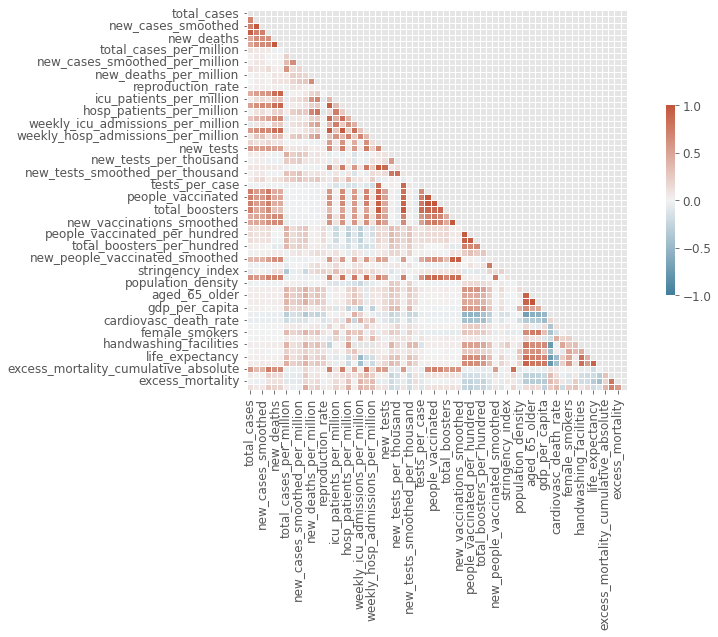

In [46]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Check Duplication

In [47]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [48]:
# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [49]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           210.09252                    0.125                  0.125   
1           210.09252                    0.125                  0.000   
2           210.09252                    0.125                  0.000   
3           210.09252                    0.125                  0.000   
4           210.09252                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23929  2020          2        Feb   24     Monday  
1                         5.23929  2020          2        Feb   25    Tuesday  
2                         5.23929  2020          2        Feb   26  Wednesday  
3                         5.23929  2020          2        Feb   27   Thursday  
4                         5.23929  2020          2        Feb   28     Friday

In [50]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.15540e+05  2.15540e+05         2.15540e+05             214565.00000   
mean   4.27578e+06  1.23017e+04         1.23313e+04              58204.85132   
std    2.68961e+07  8.52481e+04         8.31937e+04             103602.66077   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.86400e+03  0.00000e+00         6.14300e+00               1009.67200   
50%    4.58550e+04  5.40000e+01         9.37140e+01               9882.84200   
75%    5.03611e+05  9.63000e+02         1.13118e+03              70120.95800   
max    6.21148e+08  4.08174e+06         3.43627e+06             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  
count           214565.00000                    214565.00000  
mean               192.78845                       193.06496  
std               1051.55213                       667.71913  
min                  0.00000                         0.00000  
25%                  0.00000                         1.39100  
50%                  8.14000                        20.08100  
75%                100.78200                       140.09200  
max             195005.31300                     36401.60700

In [51]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12777
location                              0
date                                  0
total_cases                        6833
new_cases                          6833
new_cases_smoothed                 6833
total_cases_per_million            7808
new_cases_per_million              7808
new_cases_smoothed_per_million     7808
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

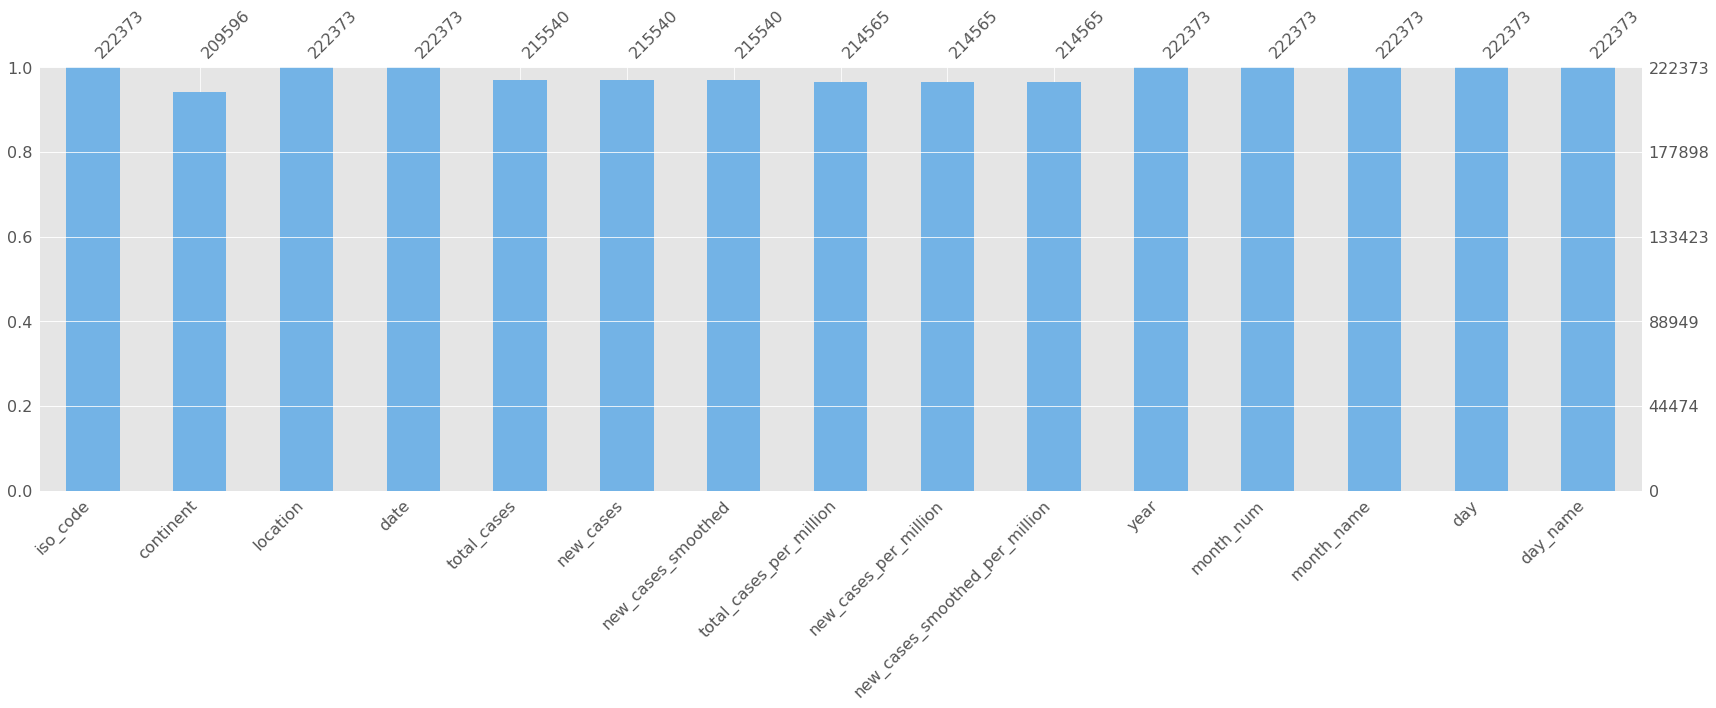

In [52]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

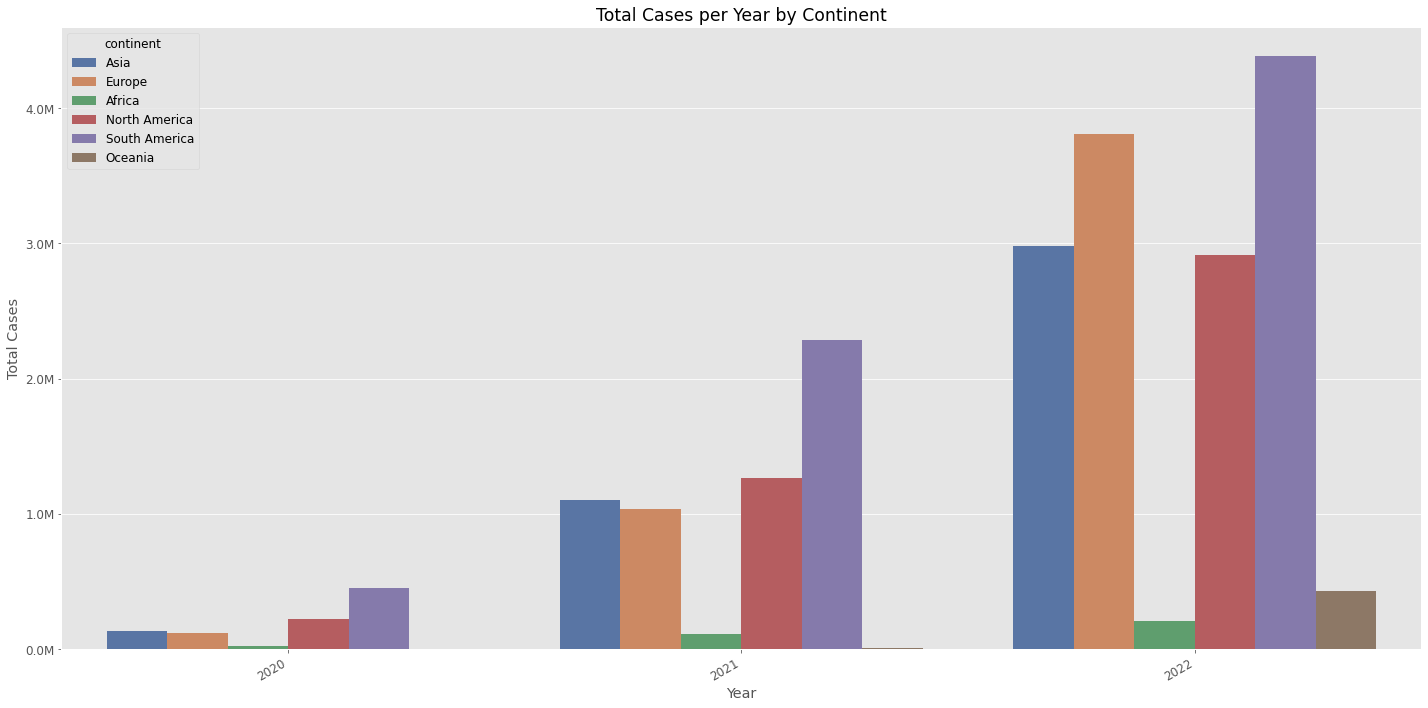

In [53]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='deep',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

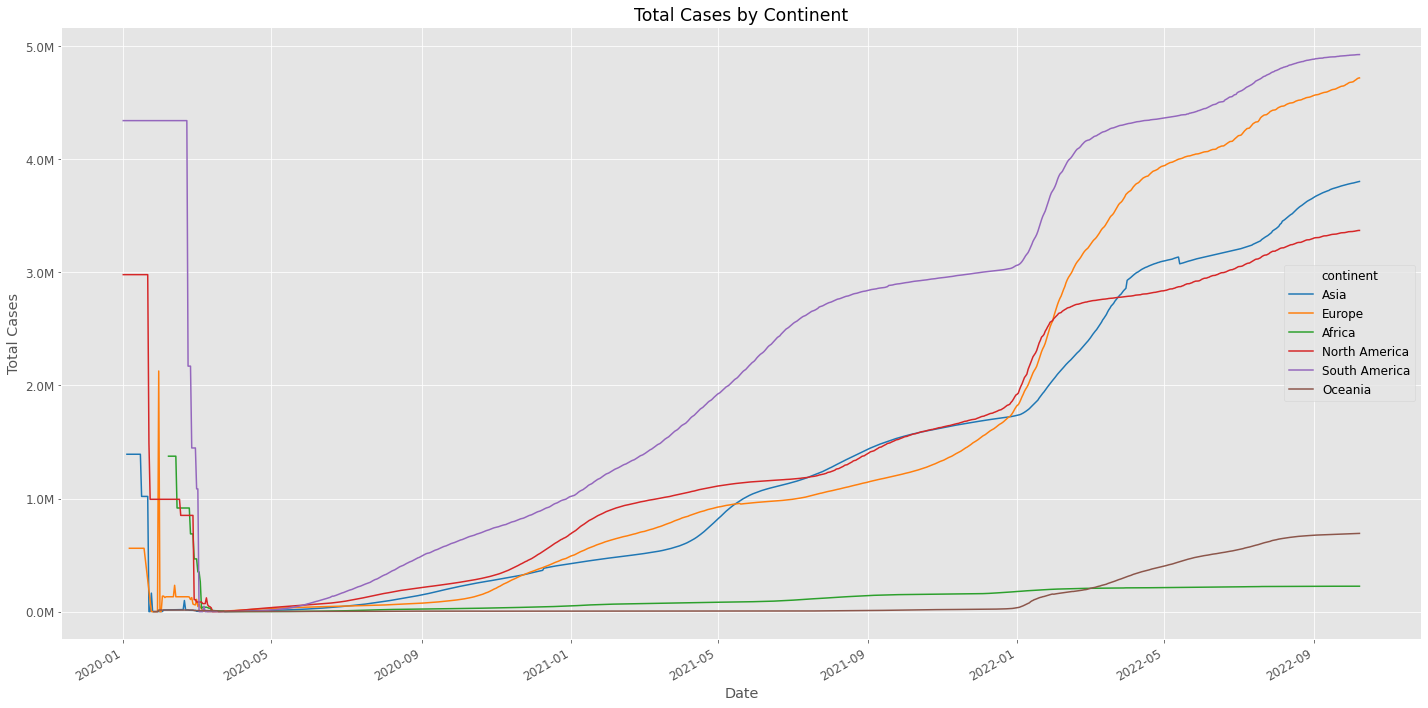

In [54]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

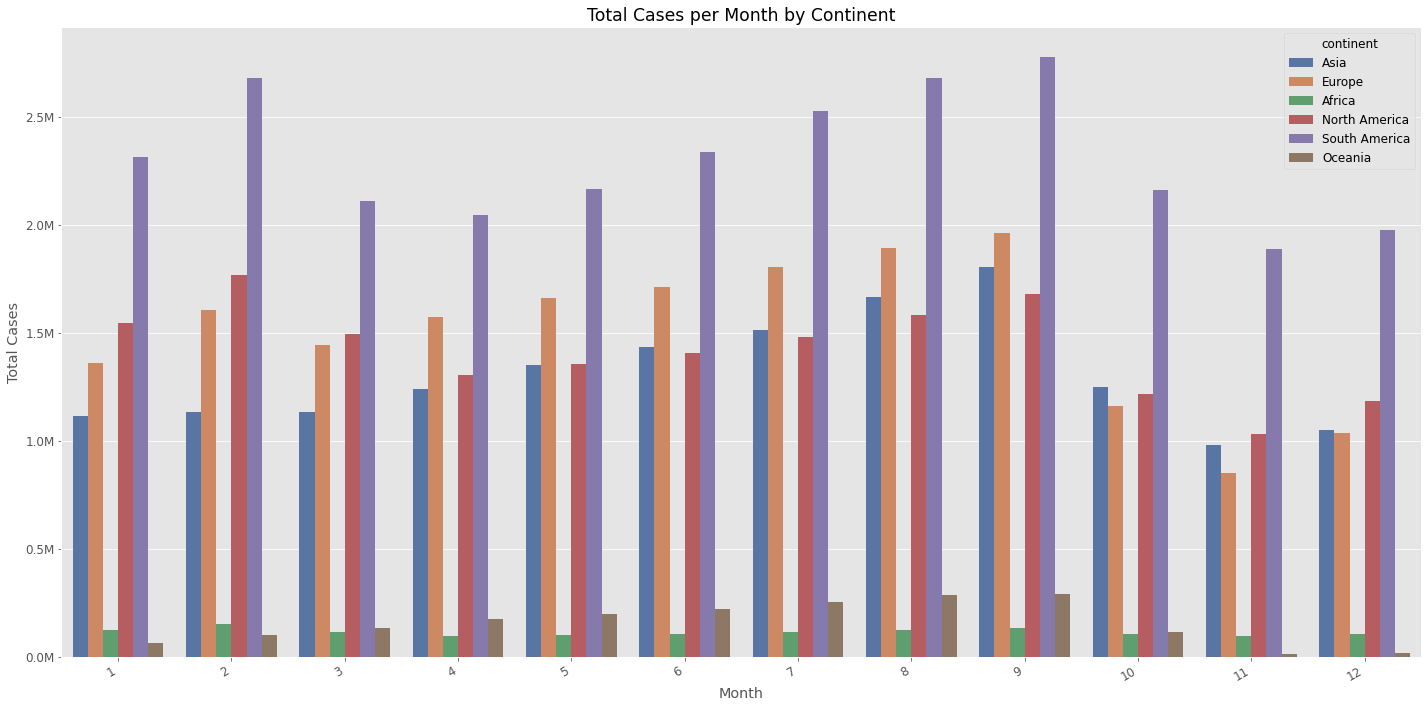

In [55]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='deep', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

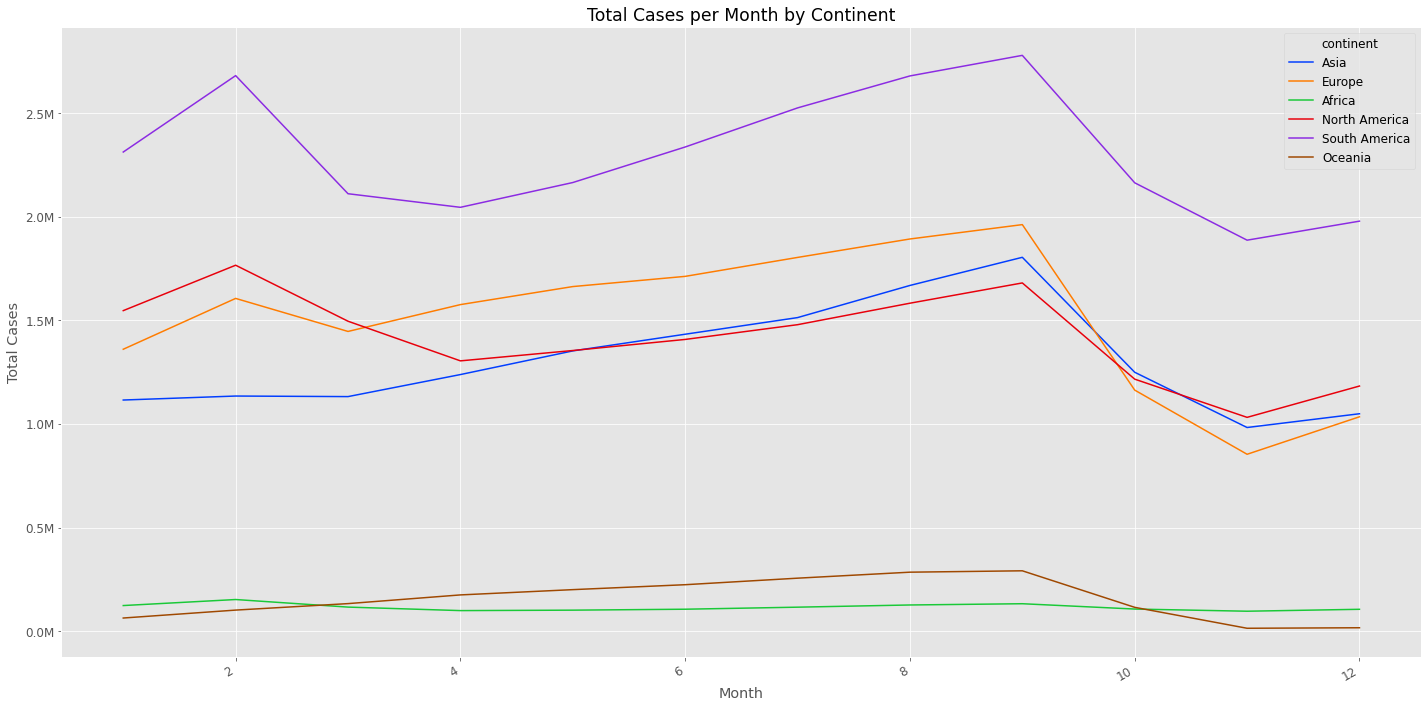

In [56]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='bright', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

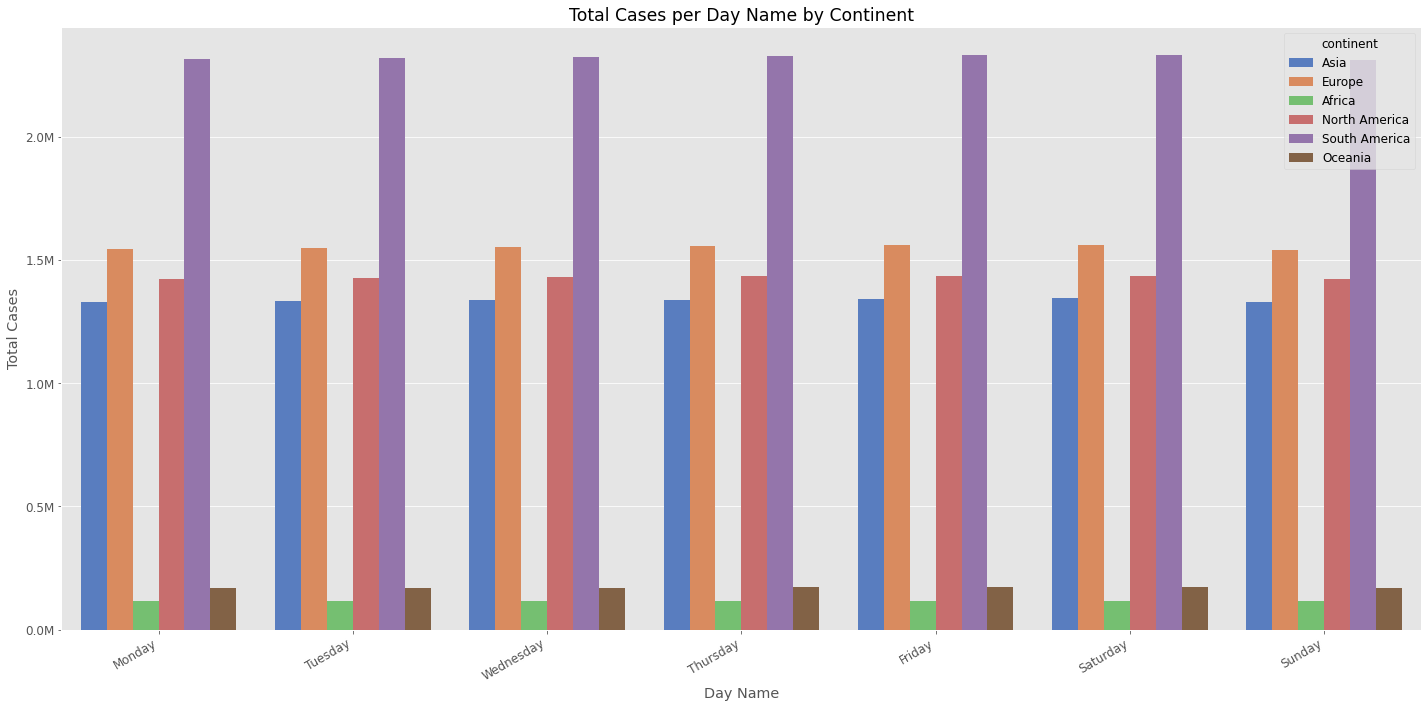

In [57]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='muted',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

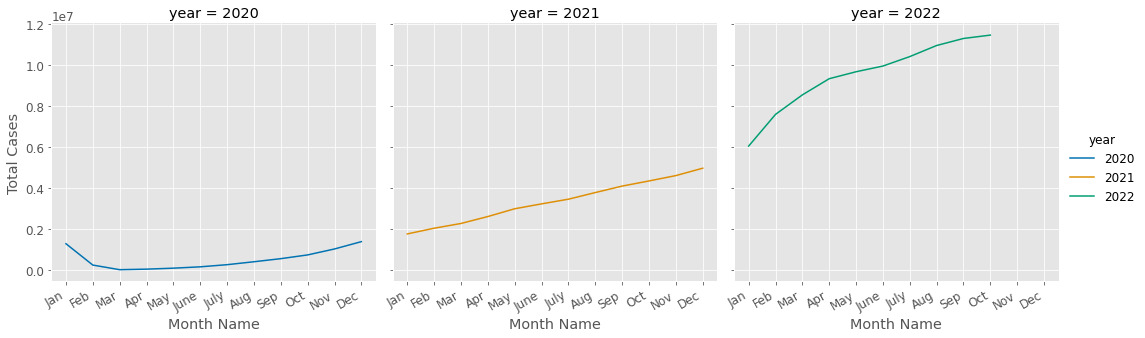

In [58]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='colorblind',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [59]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4546.13656      8.3914   
1      AFG      Asia  Afghanistan 2020-02-25    4546.13656      8.3914   
2      AFG      Asia  Afghanistan 2020-02-26    4546.13656      8.3914   
3      AFG      Asia  Afghanistan 2020-02-27    4546.13656      8.3914   
4      AFG      Asia  Afghanistan 2020-02-28    4546.13656      8.3914   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0               8.4349                 113.37152                 0.20933   
1               8.4349                 113.37152                 0.20933   
2               8.4349                 113.37152                 0.20933   
3               8.4349                 113.37152                 0.20933   
4               8.4349                 113.37152                 0.20933   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                           0.2104  2020          2        Feb   24     Monday  
1                           0.2104  2020          2        Feb   25    Tuesday  
2                           0.2104  2020          2        Feb   26  Wednesday  
3                           0.2104  2020          2        Feb   27   Thursday  
4                           0.2104  2020          2        Feb   28     Friday

In [60]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.12383e+05  212383.00000         212383.00000   
mean    6.77763e+04     129.30885            129.85066   
std     3.61109e+05     704.65118            689.98309   
min     1.00000e+00       0.00000              0.00000   
25%     8.60000e+01       0.00000              0.03224   
50%     8.63000e+02       1.00000              1.28600   
75%     8.52900e+03      12.00000             13.85700   
max     6.55668e+06   17737.00000          14858.14300   

       total_deaths_per_million  new_deaths_per_million  \
count              211408.00000            211408.00000   
mean                  659.97511                 1.43713   
std                   940.14878                 4.92700   
min                     0.00000                 0.00000   
25%                    31.40800                 0.00000   
50%                   206.32813                 0.08800   
75%                   975.82560                 1.16900   
max                  6427.31600               553.80300   

       new_deaths_smoothed_per_million  
count                     211408.00000  
mean                           1.43072  
std                            3.24019  
min                            0.00000  
25%                            0.00600  
50%                            0.24300  
75%                            1.48500  
max                          148.67300

In [61]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12777
location                               0
date                                   0
total_deaths                        9990
new_deaths                          9990
new_deaths_smoothed                 9990
total_deaths_per_million           10965
new_deaths_per_million             10965
new_deaths_smoothed_per_million    10965
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

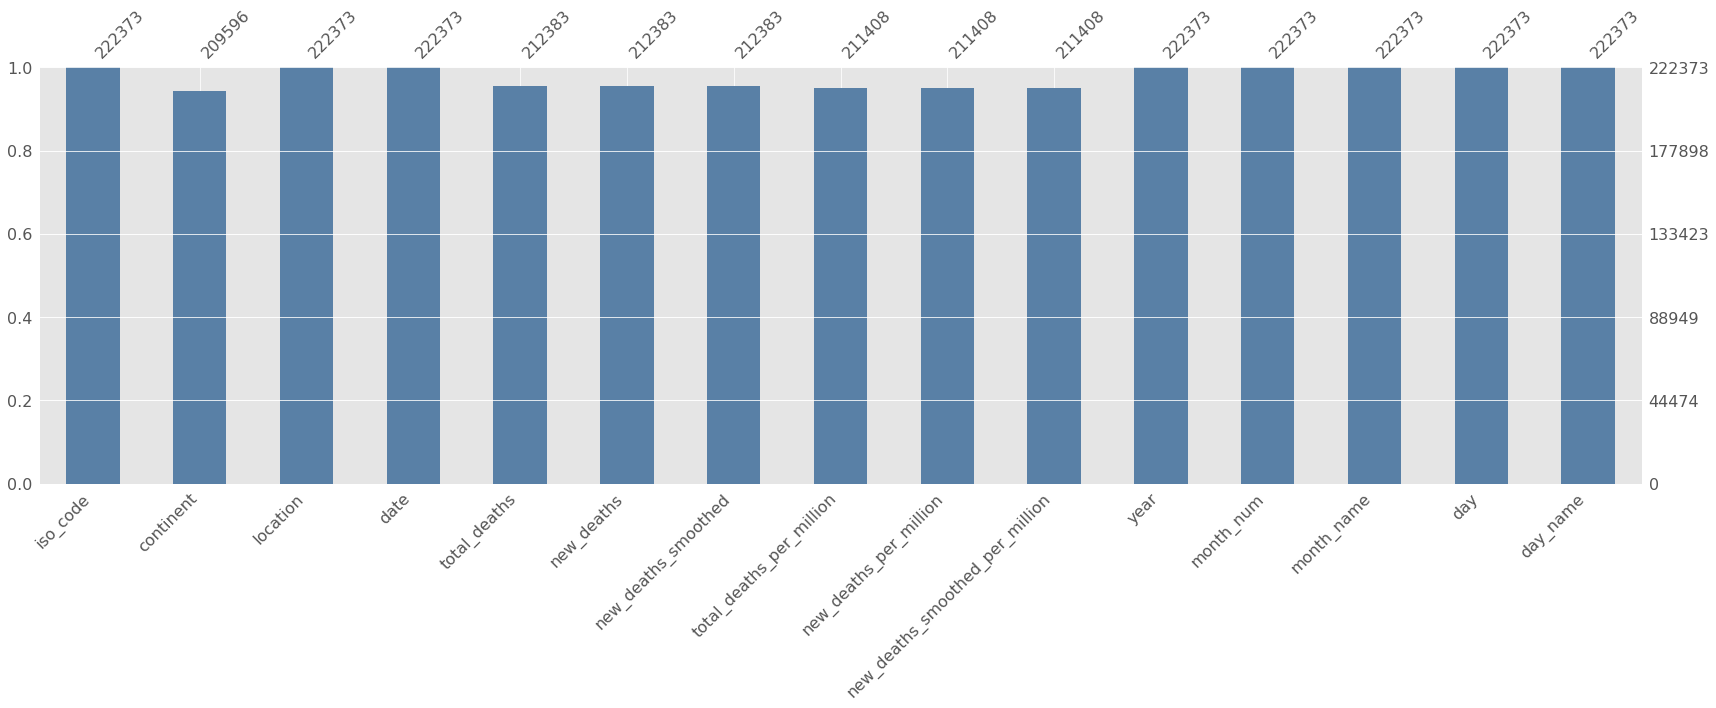

In [62]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

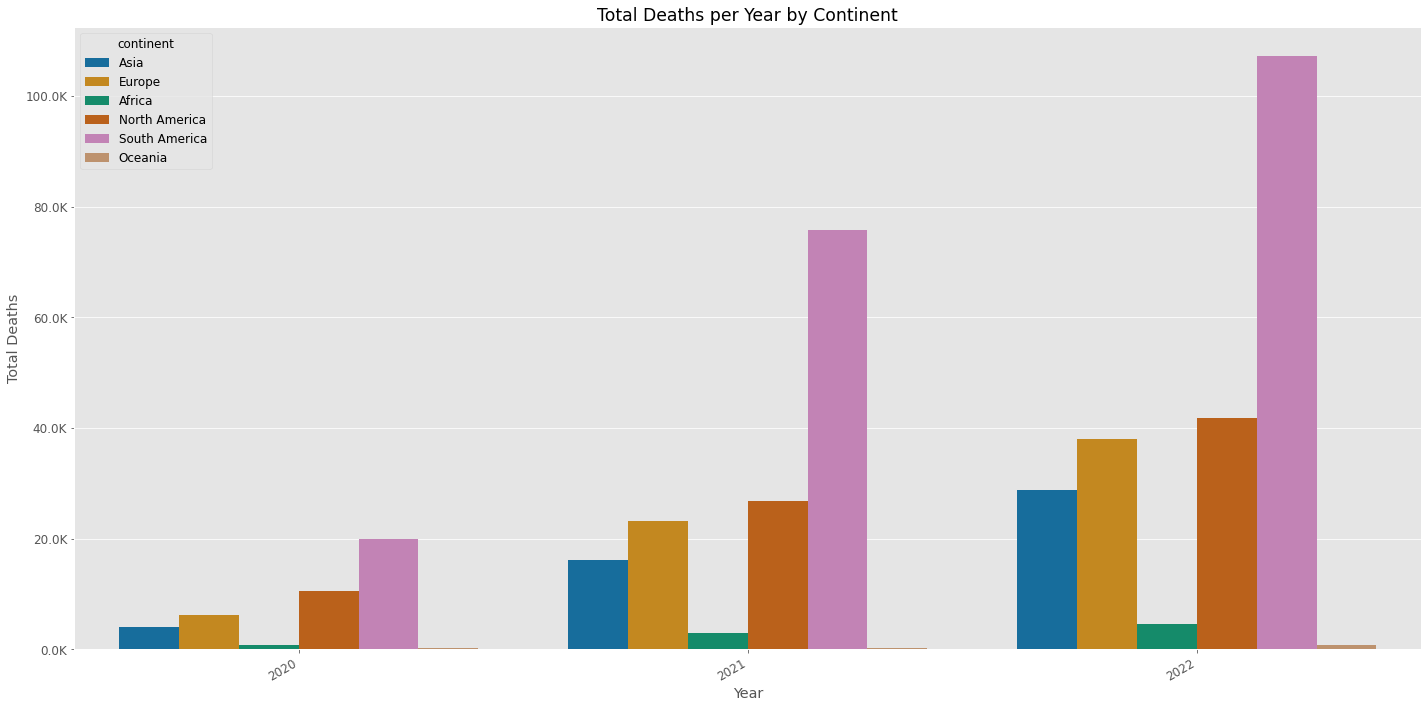

In [63]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', palette='colorblind', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

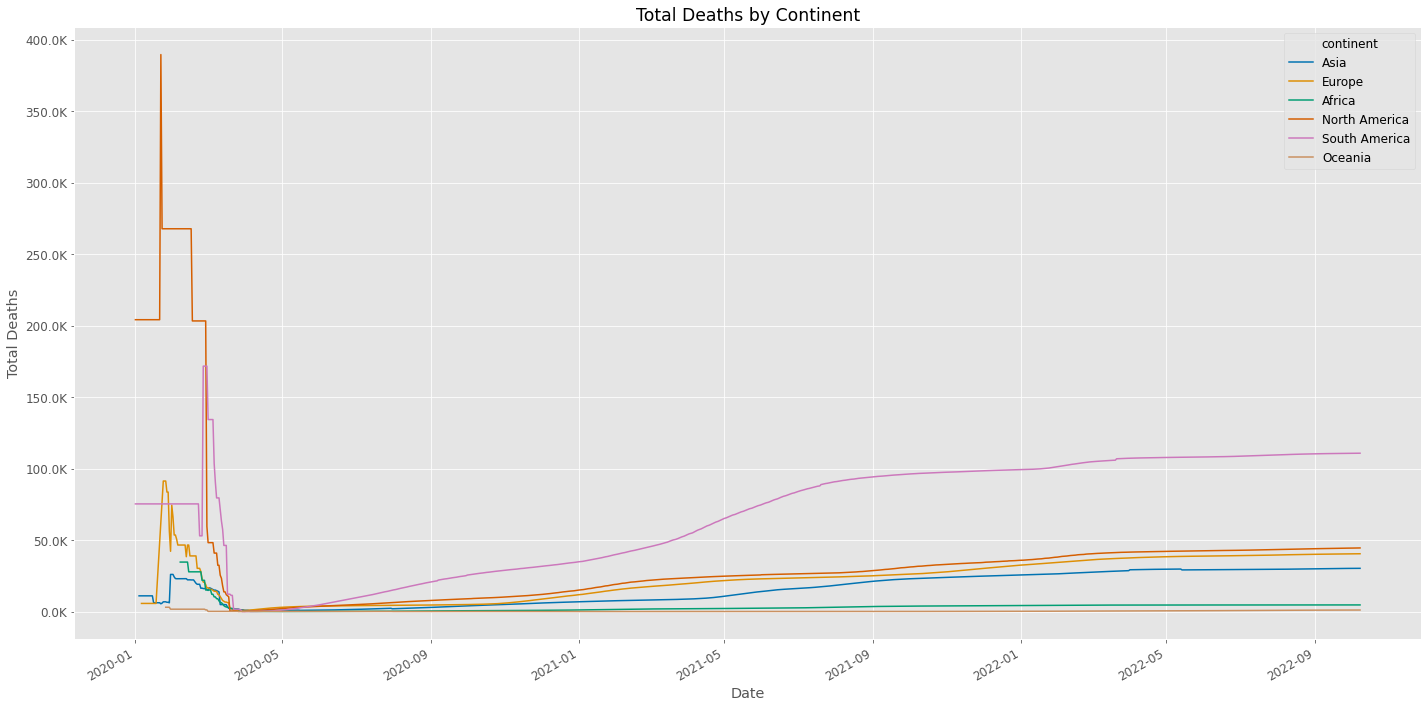

In [64]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', palette='colorblind',
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

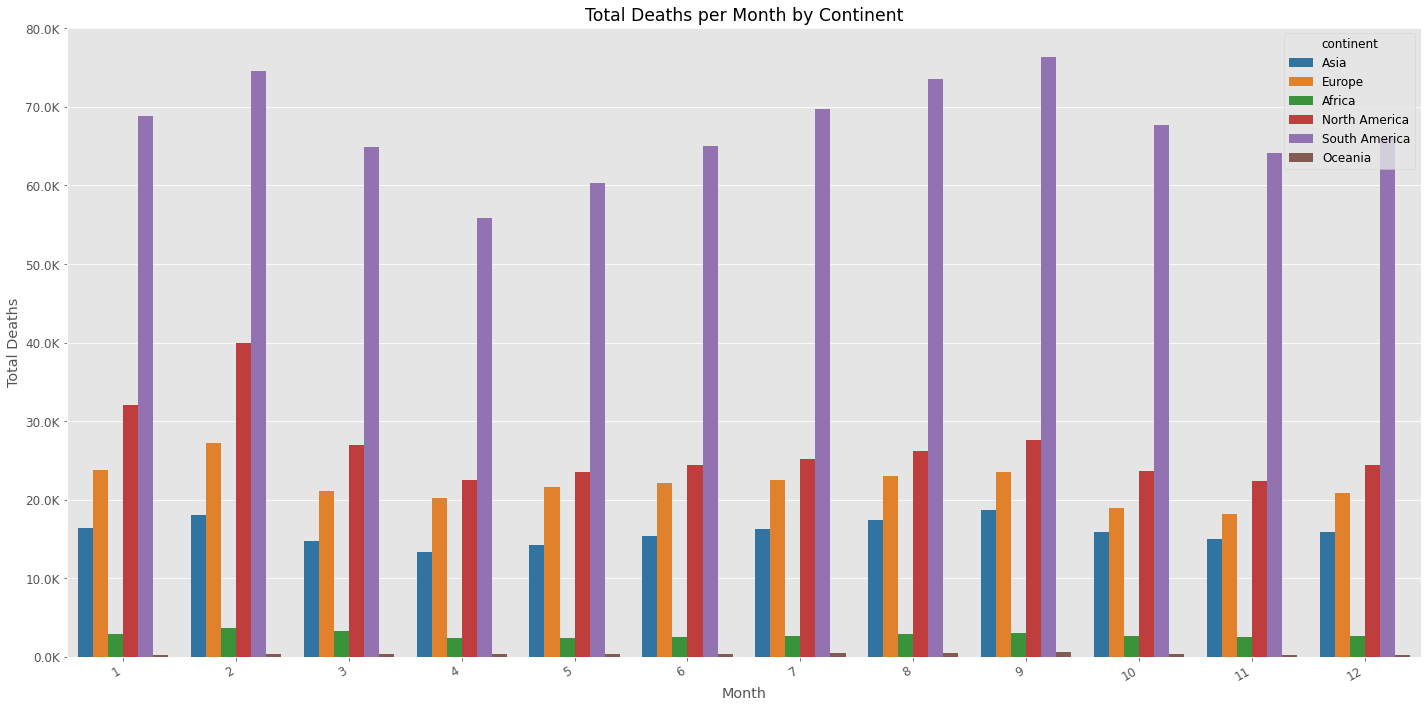

In [65]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='tab10', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

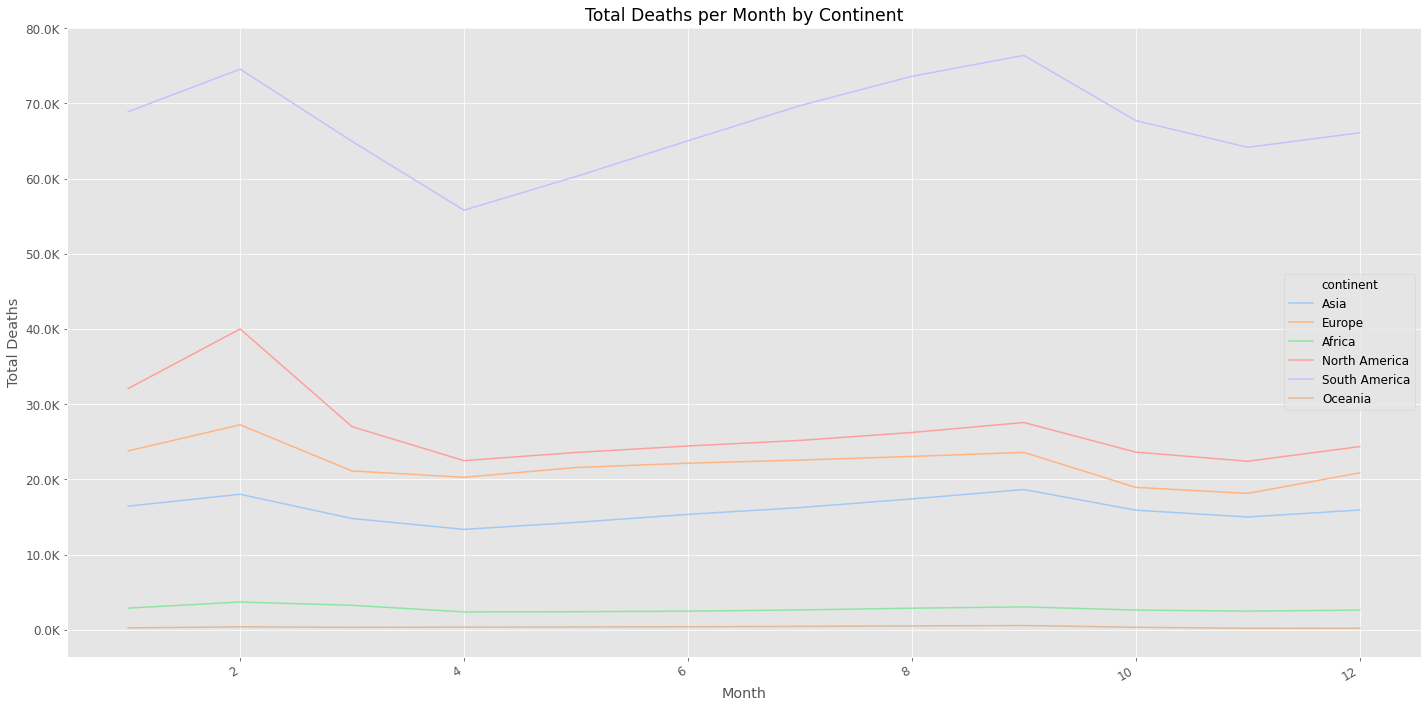

In [66]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='pastel',
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

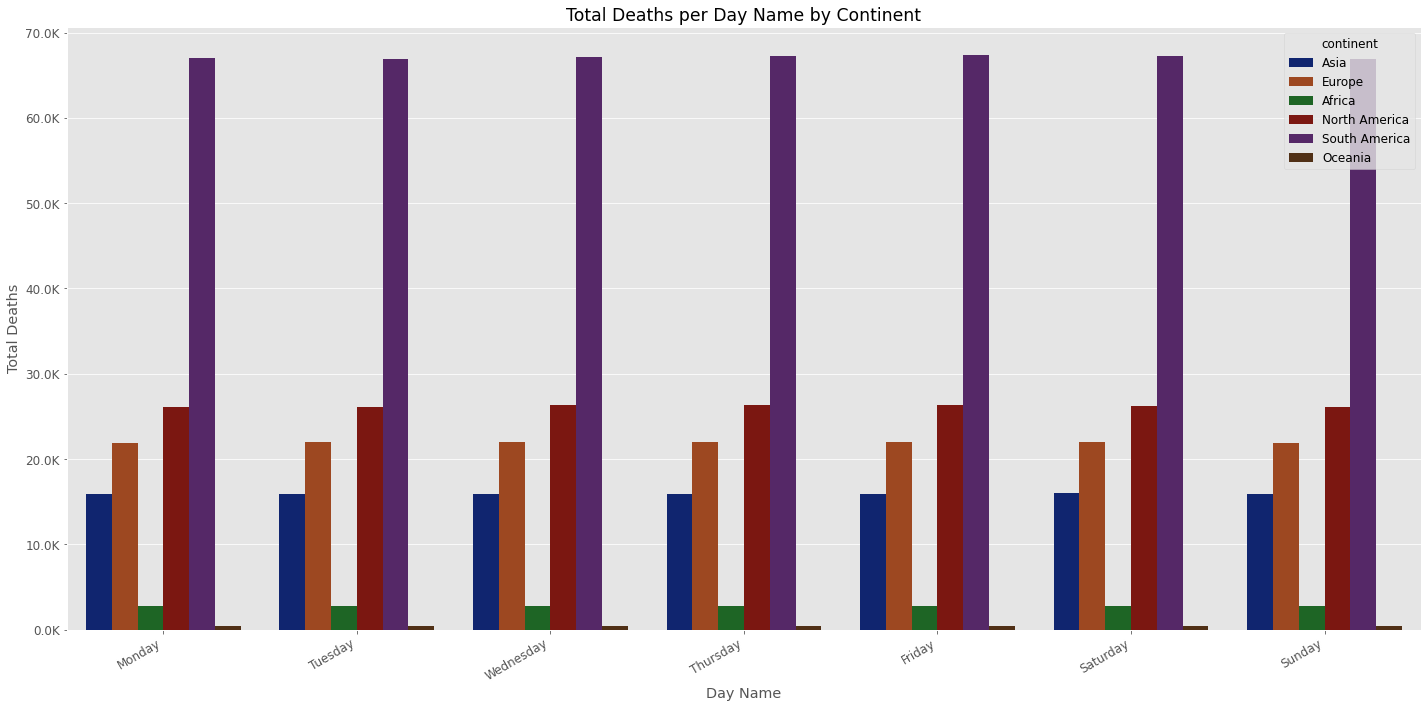

In [67]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', palette='dark',
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

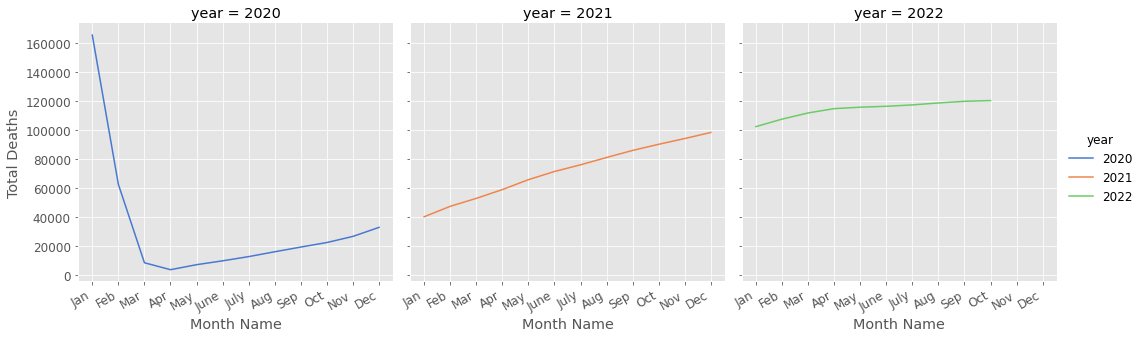

In [68]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='muted',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [69]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [70]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.46876e+05  1.76218e+05              176218.00000   
mean   4.74573e+04  3.06698e+07                 851.17596   
std    1.90363e+05  2.42217e+08                2175.62979   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  2.00292e+05                  36.73350   
50%    4.90600e+03  9.28524e+05                 186.55250   
75%    2.34245e+04  5.48304e+06                 740.39750   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            146876.00000         1.72538e+05   
mean                  3.63299         1.22566e+05   
std                   9.07994         1.08005e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95900         3.50060e+03   
75%                   3.03329         2.22070e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     172538.00000   165900.00000     1.64962e+05  
mean                           2.92287        0.09442     2.17342e+03  
std                            7.12478        0.10281     2.94521e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.05723e+01  
50%                            0.78800        0.06580     2.82000e+01  
75%                            2.65875        0.12900     8.33000e+01  
max                          147.60300        1.00000     1.02363e+06

In [71]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12777
location                                0
date                                    0
new_tests                           75497
total_tests                         46155
total_tests_per_thousand            46155
new_tests_per_thousand              75497
new_tests_smoothed                  49835
new_tests_smoothed_per_thousand     49835
positive_rate                       56473
tests_per_case                      57411
tests_units                        115585
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

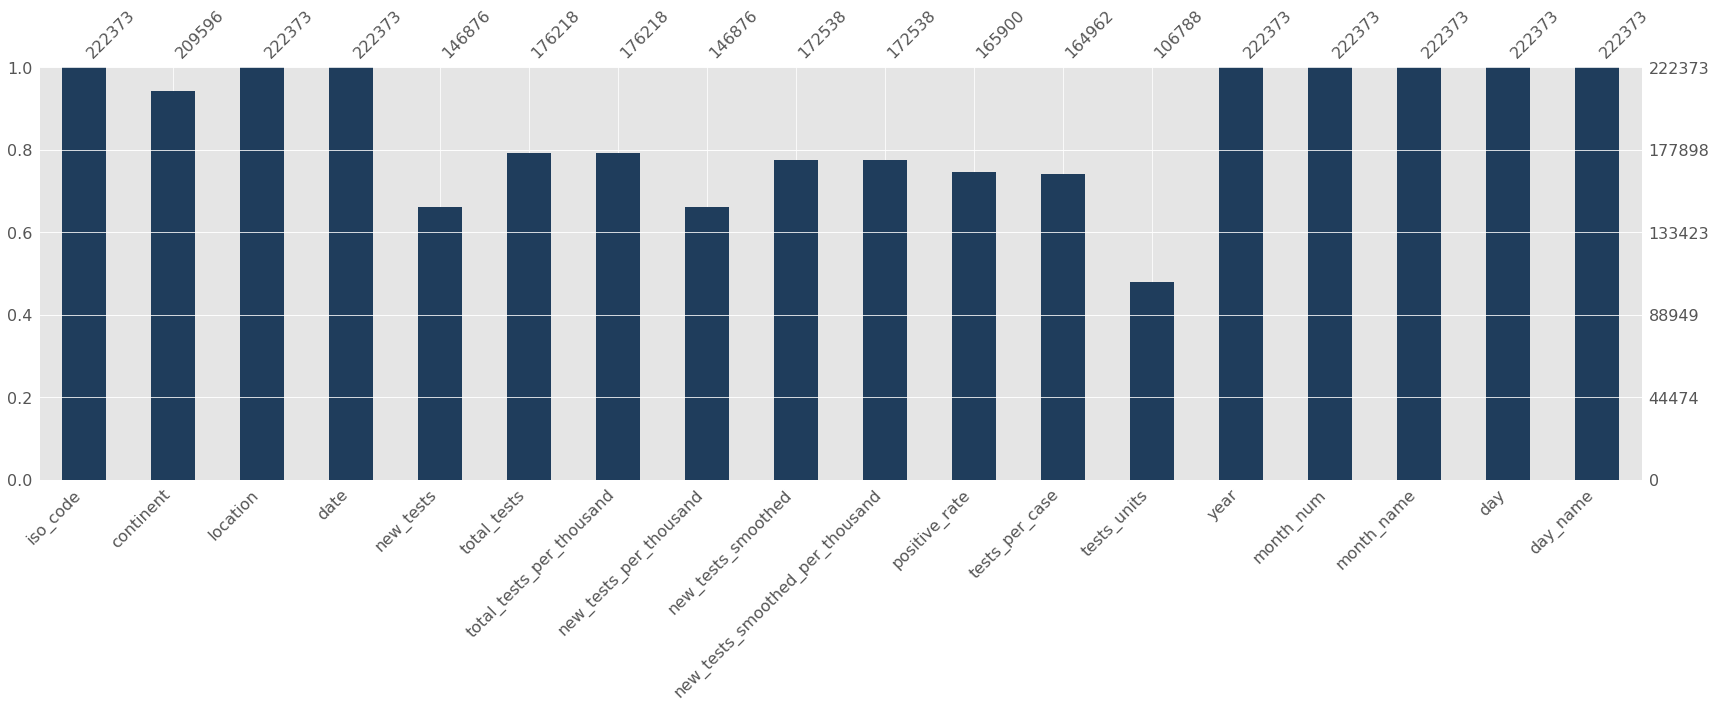

In [72]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

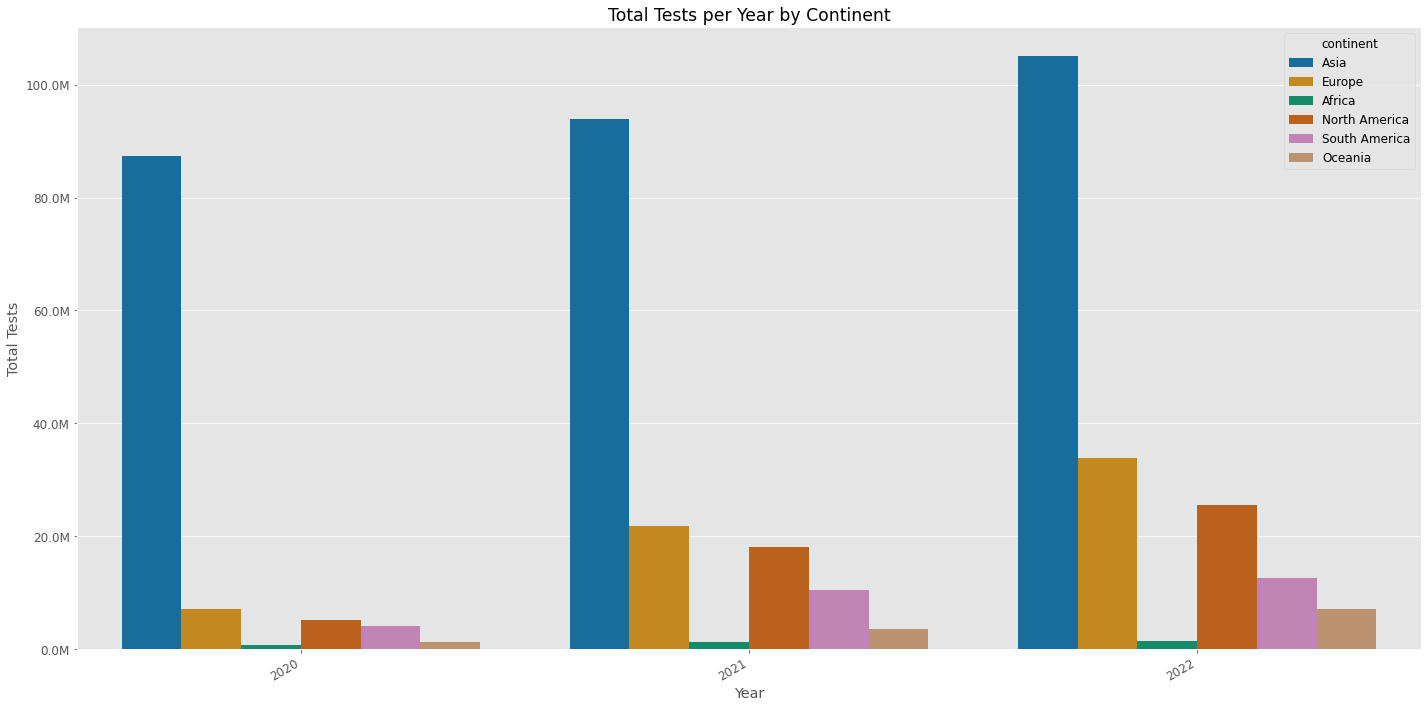

In [73]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', palette='colorblind',
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

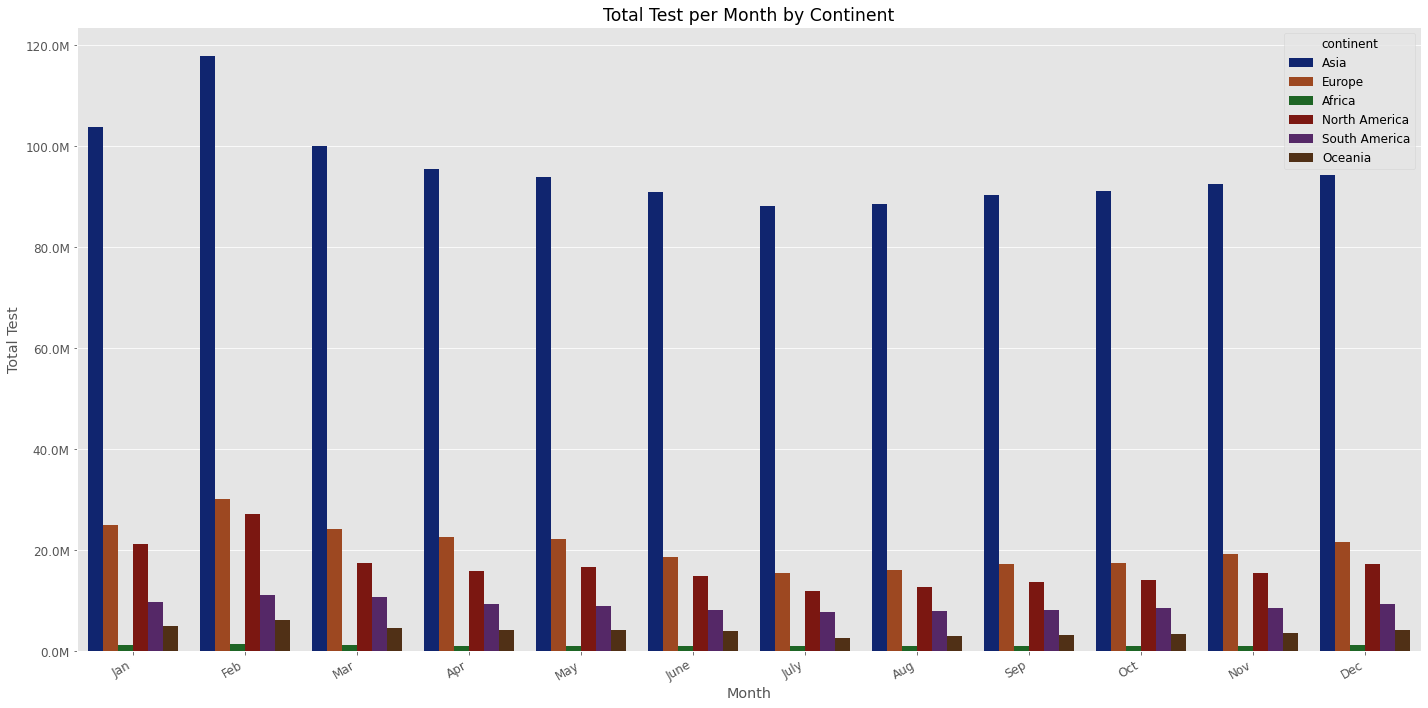

In [74]:
plot_bar(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', palette='dark', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

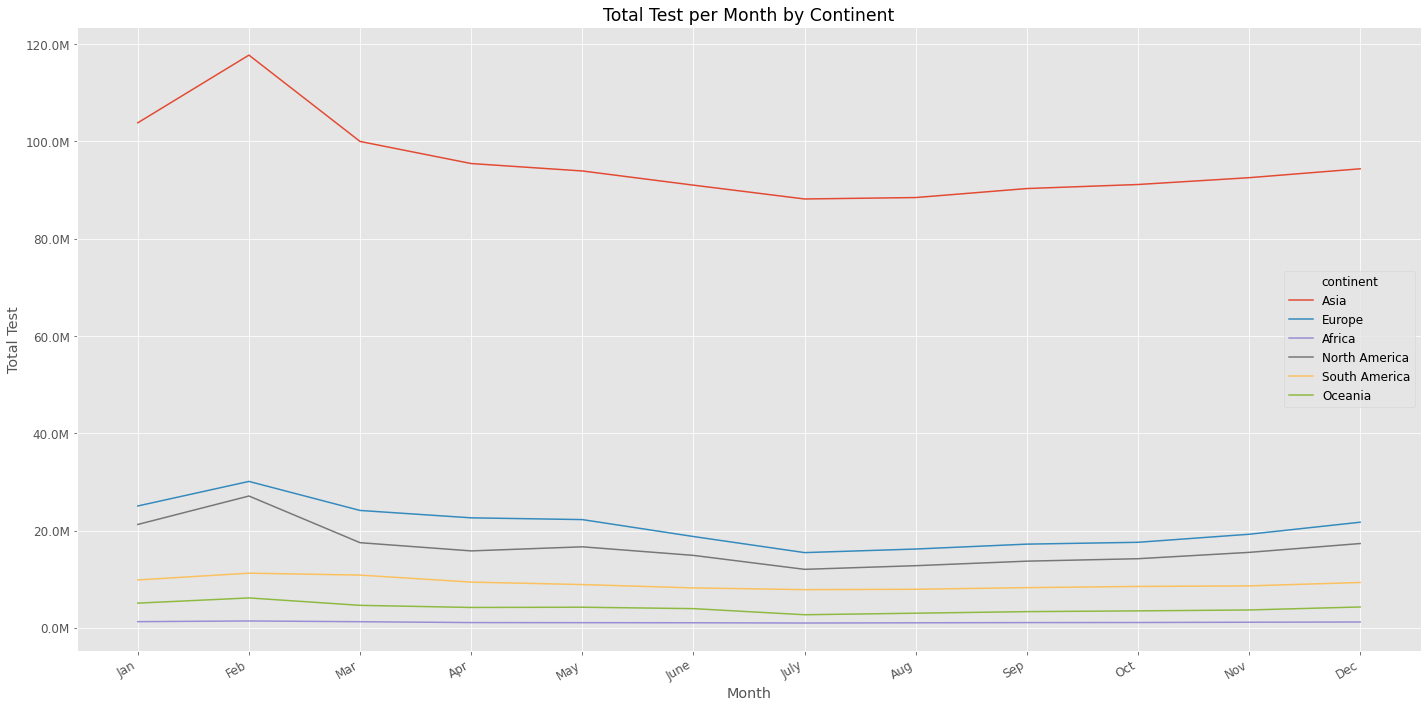

In [75]:
plot_line(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

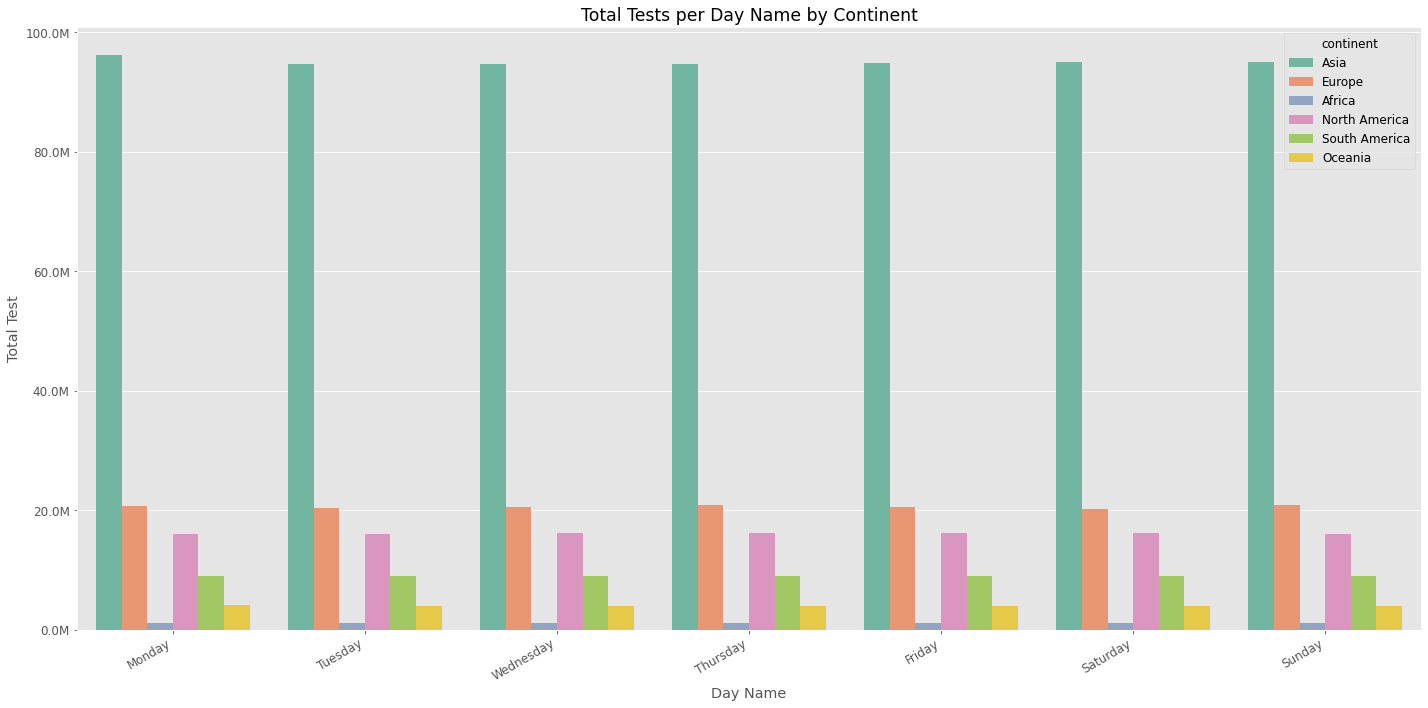

In [76]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', palette='Set2',
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

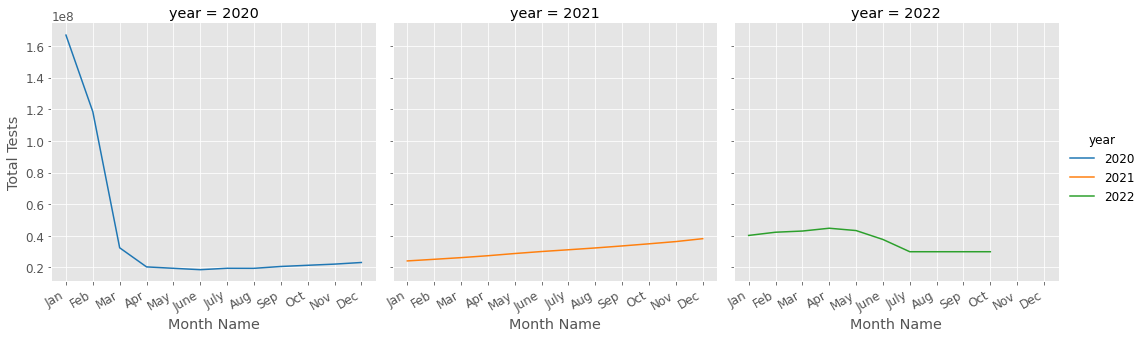

In [77]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [78]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.80752e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.80752e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.80752e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.80752e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.80752e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.39843e+06              4.24770e+06             NaN   
1        4.39843e+06              4.24770e+06             NaN   
2        4.39843e+06              4.24770e+06             NaN   
3        4.39843e+06              4.24770e+06             NaN   
4        4.39843e+06              4.24770e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                 20214.6944   
1            4714.4                 20214.6944   
2            4714.4                 20214.6944   
3            4714.4                 20214.6944   
4            4714.4                 20214.6944   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                        11.98908                       10.96875   
1                        11.98908                       10.96875   
2                        11.98908                       10.96875   
3                        11.98908                       10.96875   
4                        11.98908                       10.96875   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.59292                         NaN   
1                             10.59292                         NaN   
2                             10.59292                         NaN   
3                             10.59292                         NaN   
4                             10.59292                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              504.17487                     18590.26486   
1                              504.17487                     18590.26486   
2                              504.17487                     18590.26486   
3                              504.17487                     18590.26486   
4                              504.17487                     18590.26486   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04641  2020          2        Feb   
1                                     0.04641  2020          2        Feb   
2                                     0.04641  2020          2        Feb   
3                                     0.04641  2020          2        Feb   
4                                     0.04641  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [79]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.12703e+05        2.12703e+05              2.12703e+05   
mean          1.31277e+08        6.33910e+07              5.41152e+07   
std           7.41165e+08        3.44762e+08              3.00291e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.65793e+05        2.19717e+05              1.81499e+05   
50%           2.46555e+06        1.44890e+06              1.22214e+06   
75%           1.46452e+07        7.73370e+06              6.76752e+06   
max           1.27940e+10        5.39226e+09              4.96457e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.92345e+05       1.77017e+05                2.12703e+05   
mean      2.18371e+07       4.58933e+05                3.71194e+05   
std       1.19705e+08       2.33313e+06                2.10376e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.97721e+04       3.01000e+03                9.37000e+02   
50%       4.76566e+05       1.51907e+04                7.89600e+03   
75%       4.31052e+06       8.86289e+04                5.27557e+04   
max       2.55496e+09       4.96754e+07                4.36900e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    212703.00000                   212703.00000   
mean                         78.62177                       38.78213   
std                          60.84336                       25.22241   
min                           0.00000                        0.00000   
25%                          24.63671                       16.28644   
50%                          72.39799                       39.40807   
75%                         117.01575                       57.32000   
max                         374.24000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         212703.00000                192345.00000   
mean                              34.16192                    20.33583   
std                               23.61419                    20.25528   
min                                0.00000                     0.00000   
25%                               12.85400                     2.69000   
50%                               32.88250                    14.40705   
75%                               51.08000                    32.51656   
max                              126.79000                   139.74000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           212703.00000                     2.12703e+05   
mean                              2617.06739                     1.41259e+05   
std                               3206.98393                     8.37304e+05   
min                                  0.00000                     0.00000e+00   
25%                                581.00000                     3.04000e+02   
50%                               1847.32134                     3.32637e+03   
75%                               3434.97222                     2.08960e+04   
max                             117862.00000                     2.10710e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                212703.00000  
mean                                      0.11291  
std                                       0.18516  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07521  
75%                                       0.13208  
max                                      11.78600

In [80]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12777
location                                          0
date                                              0
total_vaccinations                             9670
people_vaccinated                              9670
people_fully_vaccinated                        9670
total_boosters                                30028
new_vaccinations                              45356
new_vaccinations_smoothed                      9670
total_vaccinations_per_hundred                 9670
people_vaccinated_per_hundred                  9670
people_fully_vaccinated_per_hundred            9670
total_boosters_per_hundred                    30028
new_vaccinations_smoothed_per_million          9670
new_people_vaccinated_smoothed                 9670
new_people_vaccinated_smoothed_per_hundred     9670
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

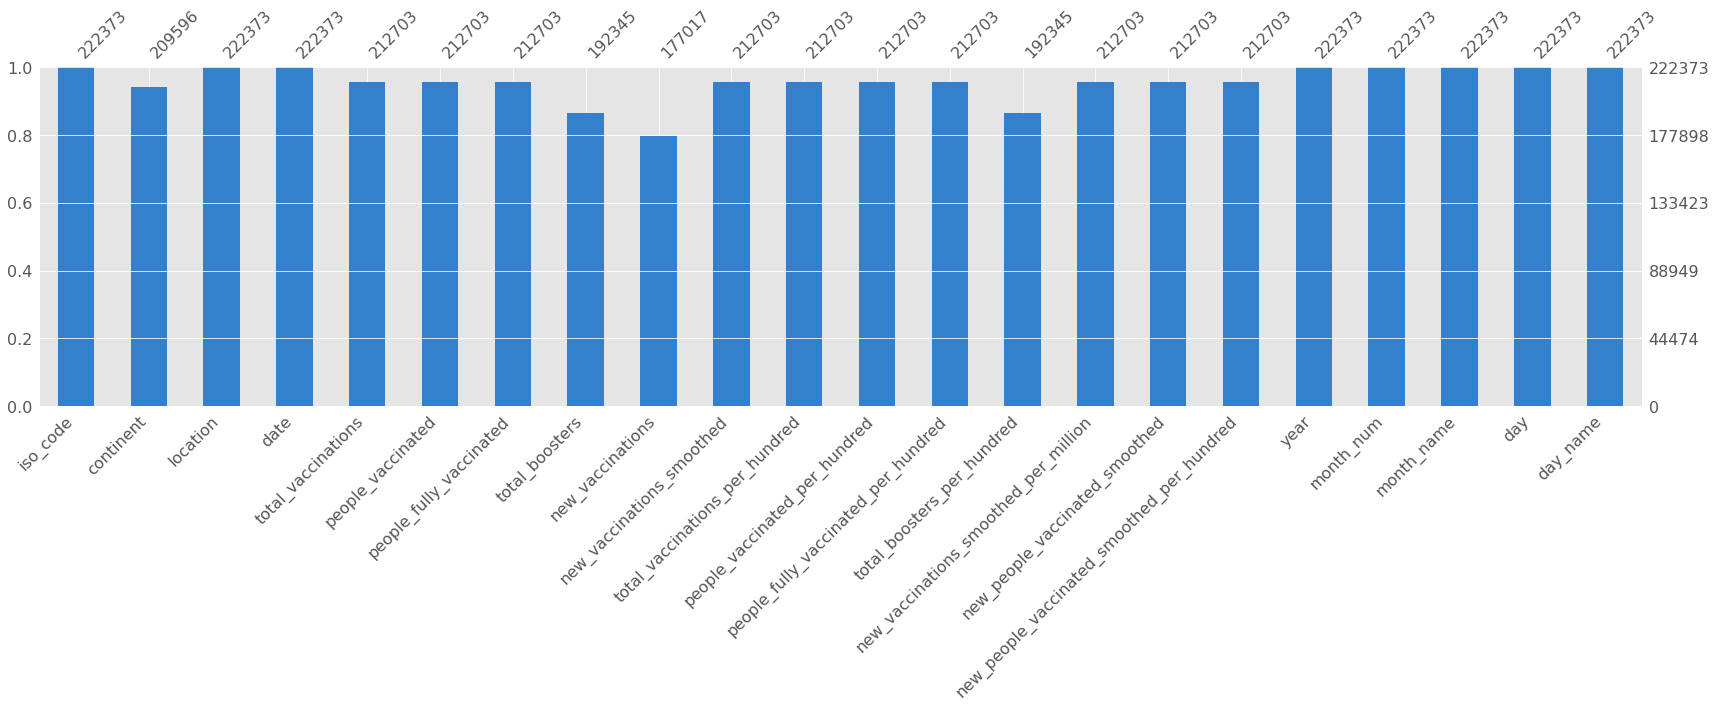

In [81]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

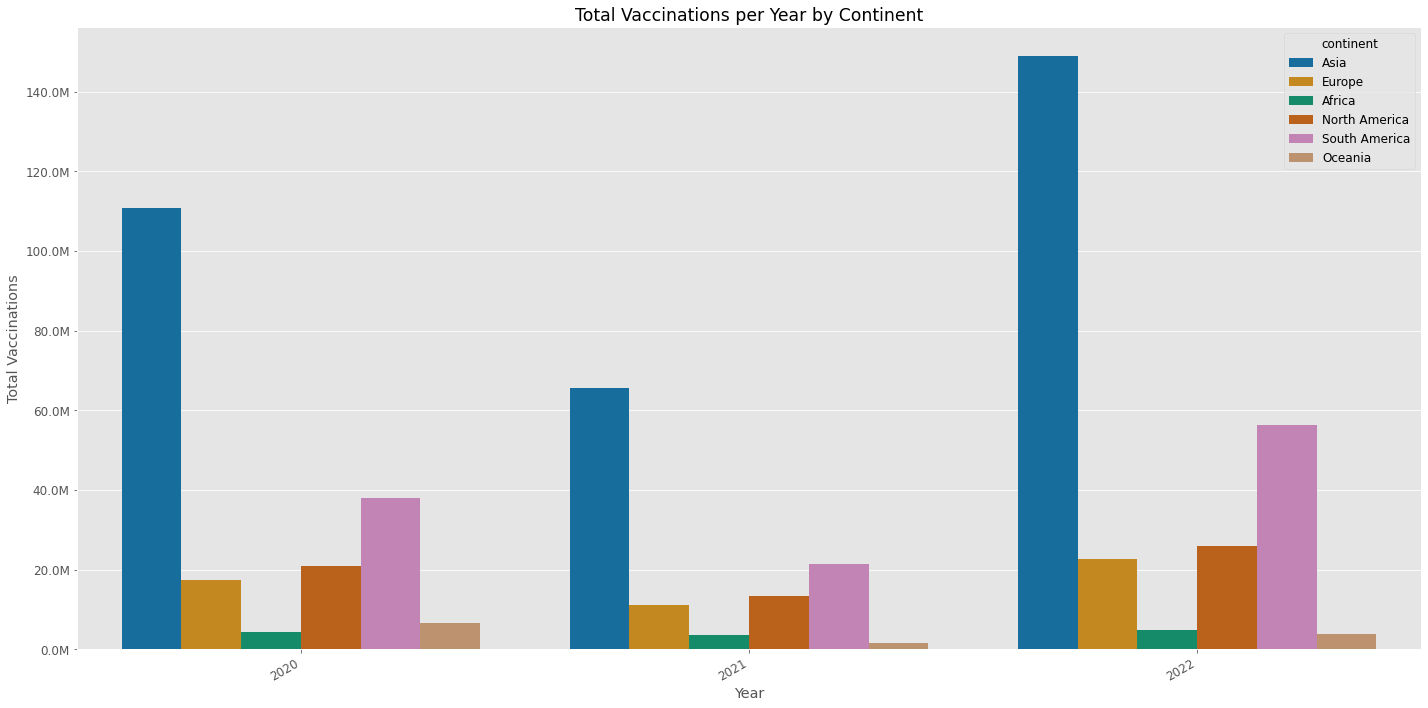

In [82]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', palette='colorblind', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

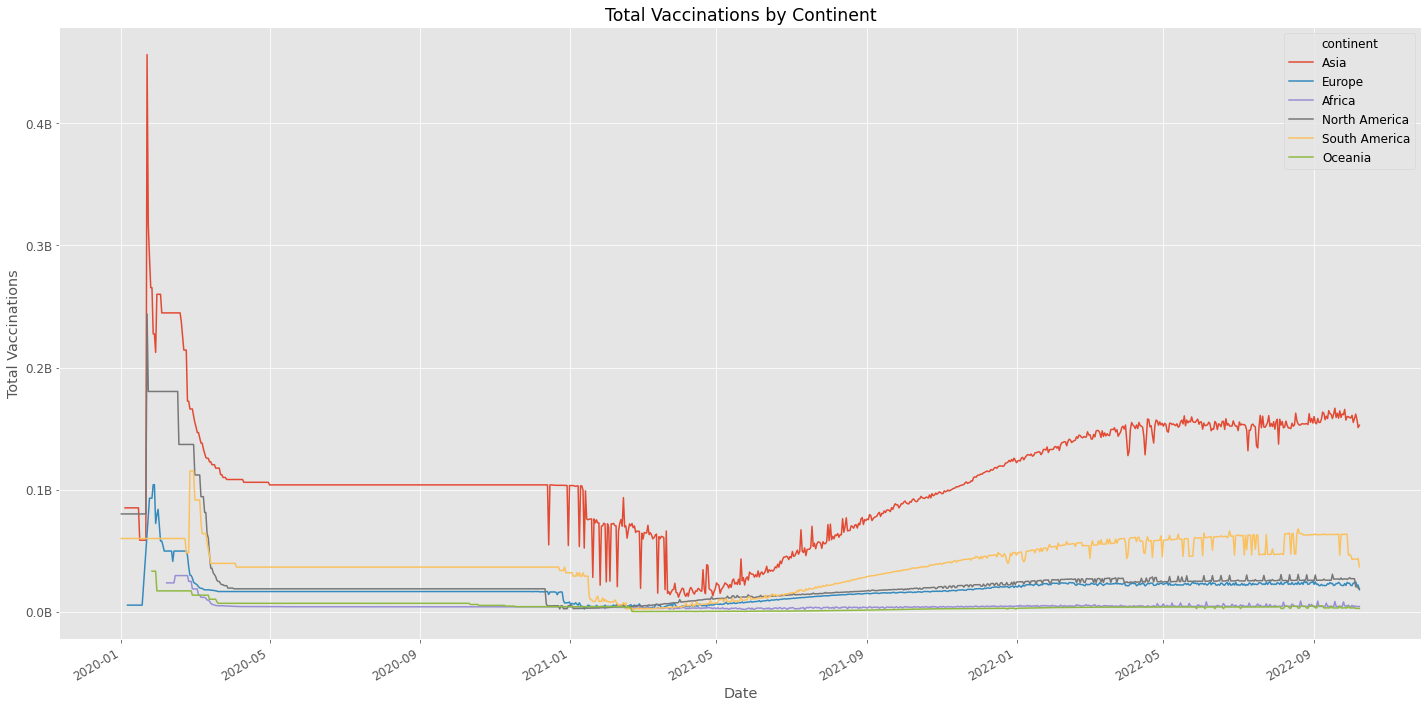

In [83]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

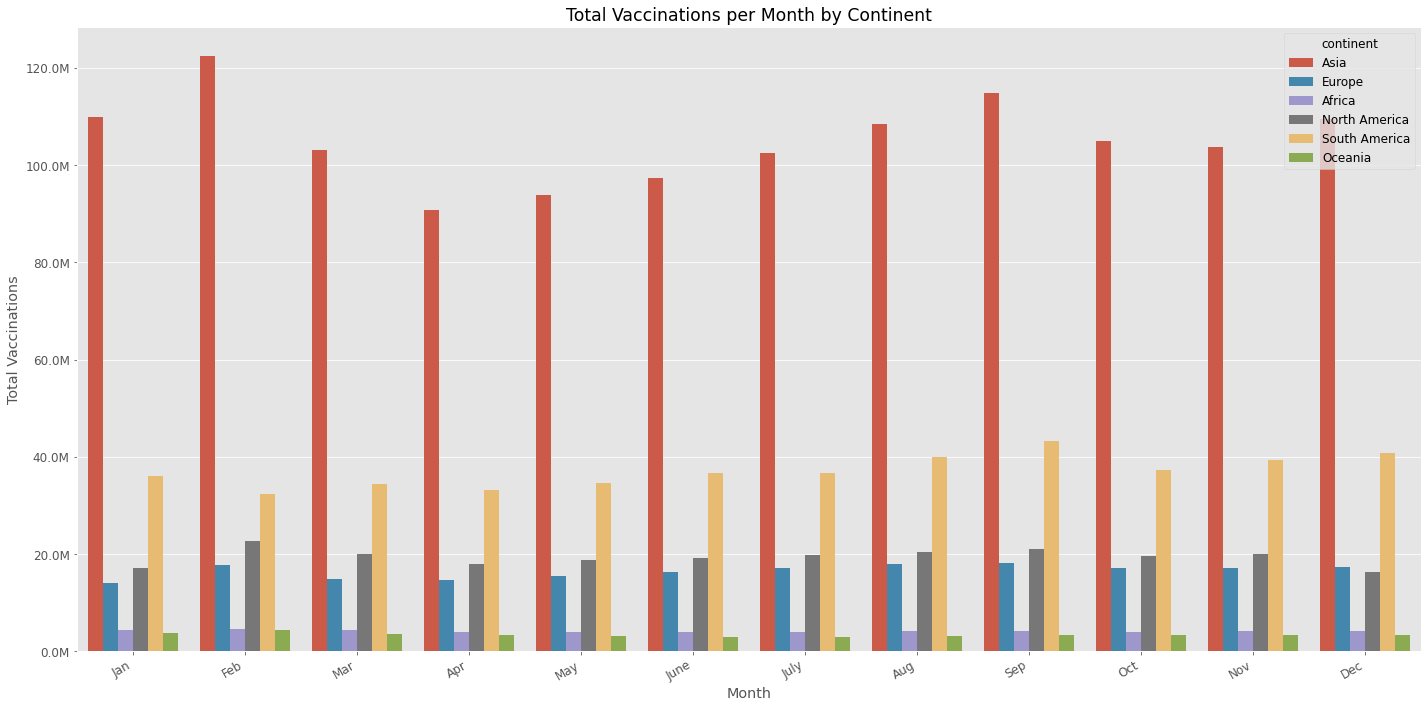

In [84]:
plot_bar(
    data=df_vacc,
    x='month_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

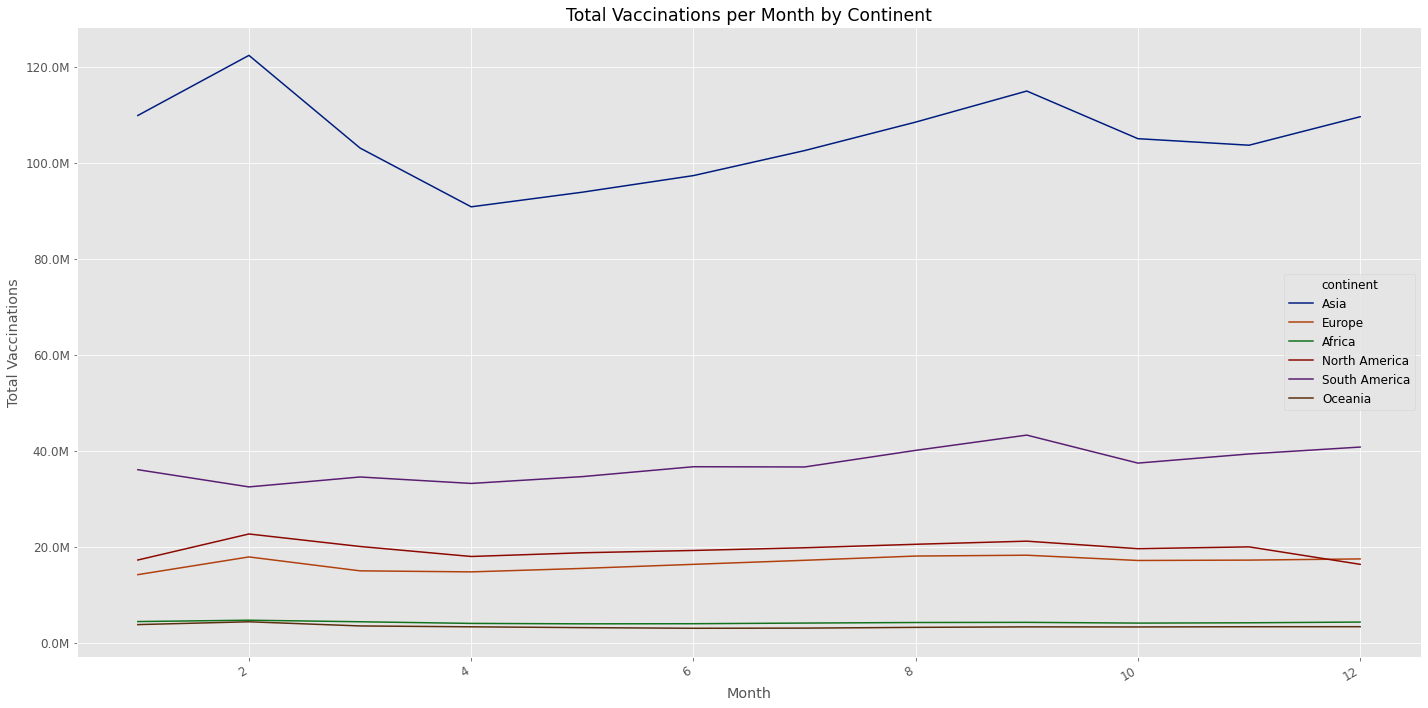

In [85]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', palette='dark', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

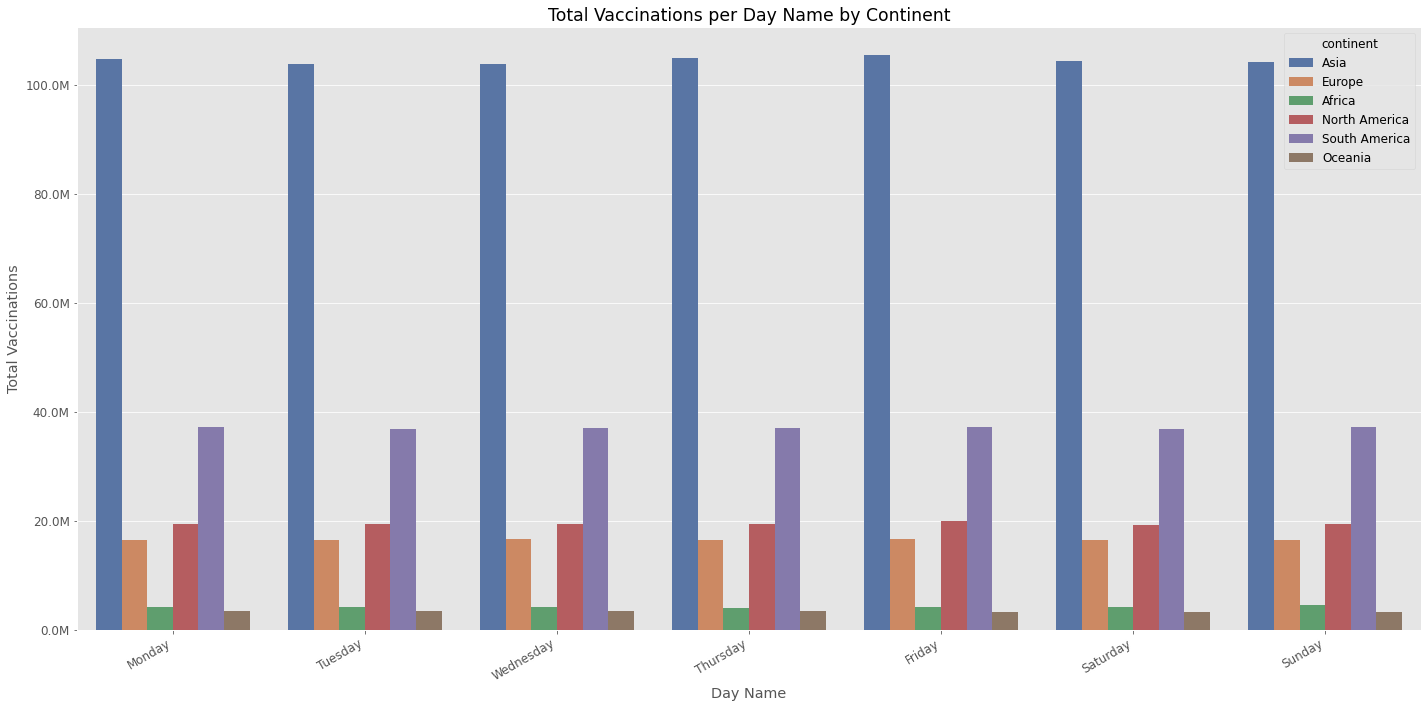

In [86]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', palette='deep', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

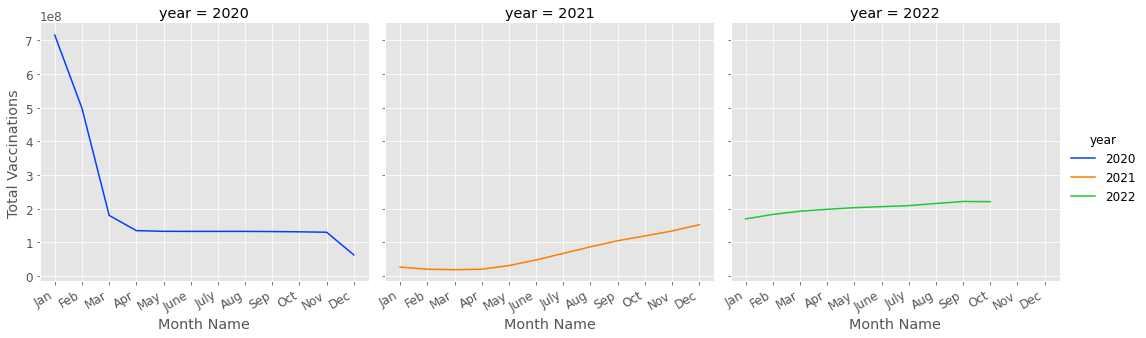

In [87]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [88]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [89]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.21081e+05        197508.00000  182773.00000   180844.00000   
mean   1.42318e+08           456.49316      30.61716        8.80412   
std    6.93875e+08          2105.32630       9.06220        6.12661   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.31200      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   181817.00000    182129.00000     118668.00000           182286.00000   
mean         5.55379     19553.85297         13.63195              261.41526   
std          4.16202     20538.42500         20.03114              120.22250   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.40000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         191631.00000    137971.00000  136082.00000   
mean               8.38547        10.67454      32.80869   
std                4.73149        10.62475      13.53431   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             89724.00000                162215.00000     207787.00000   
mean                 50.93560                     3.08922         73.62043   
std                  31.88369                     2.55253          7.44612   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  83.24100                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             177787.00000                           1.09024e+05   
mean                   0.72483                           3.52937e+04   
std                    0.14961                           9.92445e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74200                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 109024.00000      109024.00000   
mean                       9.44760          15.89675   
std                       11.68302          13.73314   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             109024.00000  
mean                                1089.08872  
std                                 1225.79420  
min                                -1884.67898  
25% 

In [90]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12777
location                                        0
date                                            0
population                                   1292
population_density                          24865
median_age                                  39600
aged_65_older                               41529
aged_70_older                               40556
gdp_per_capita                              40244
extreme_poverty                            103705
cardiovasc_death_rate                       40087
diabetes_prevalence                         30742
female_smokers                              84402
male_smokers                                86291
handwashing_facilities                     132649
hospital_beds_per_thousand                  60158
life_expectancy                             14586
human_development_index                     44586
excess_mortality_cumulative_absolute       113349


<AxesSubplot:>

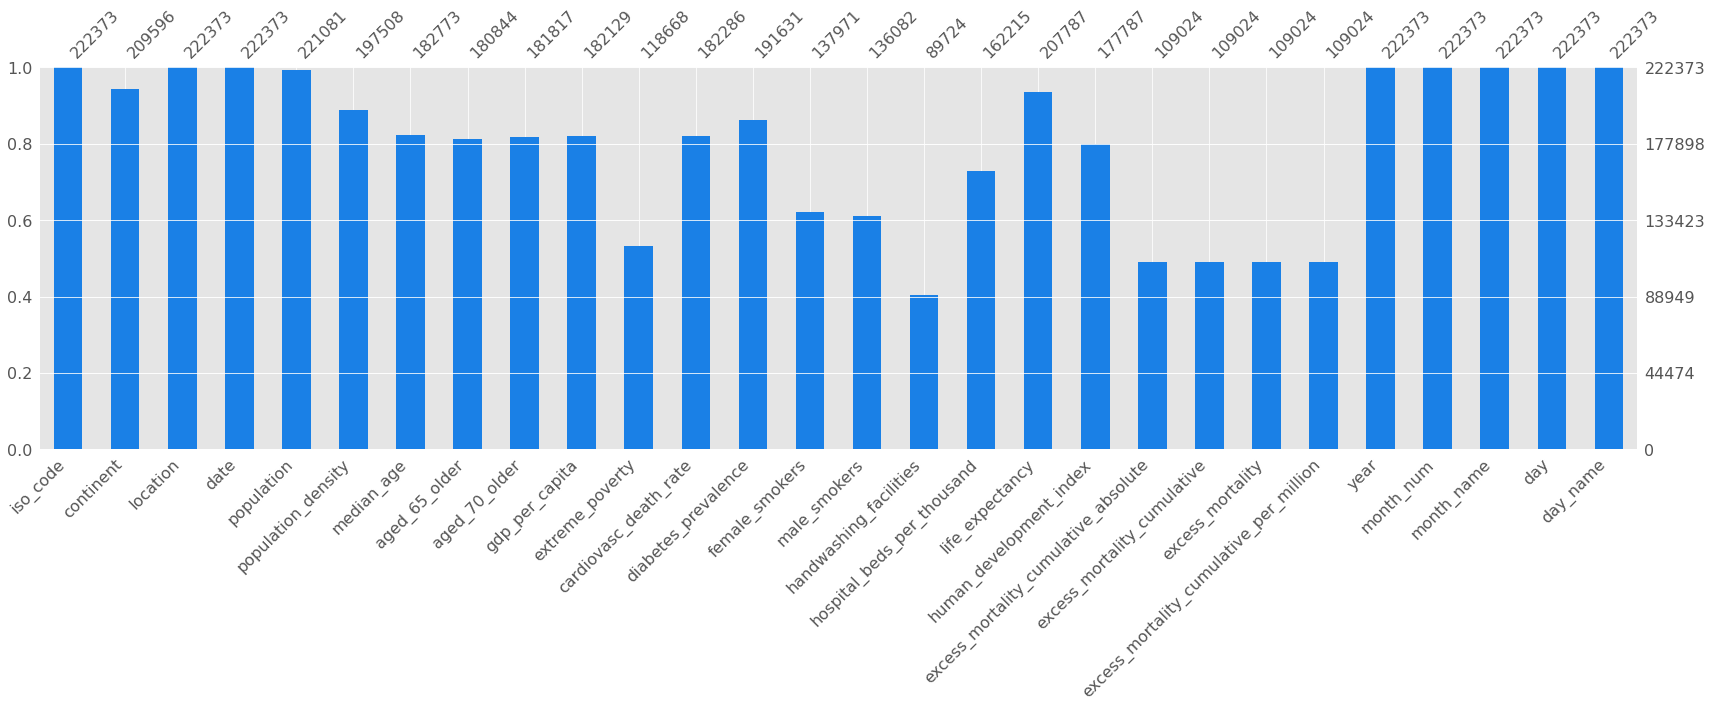

In [91]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

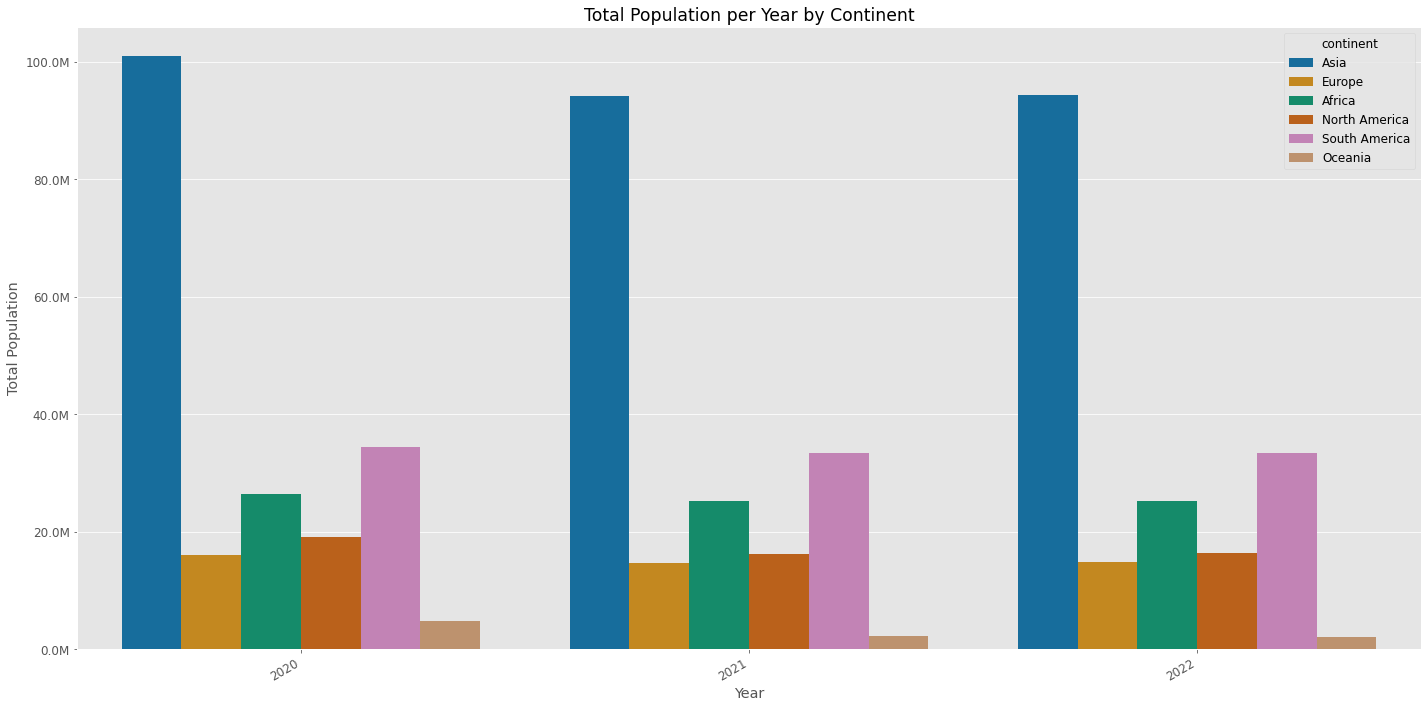

In [92]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', palette='colorblind',
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

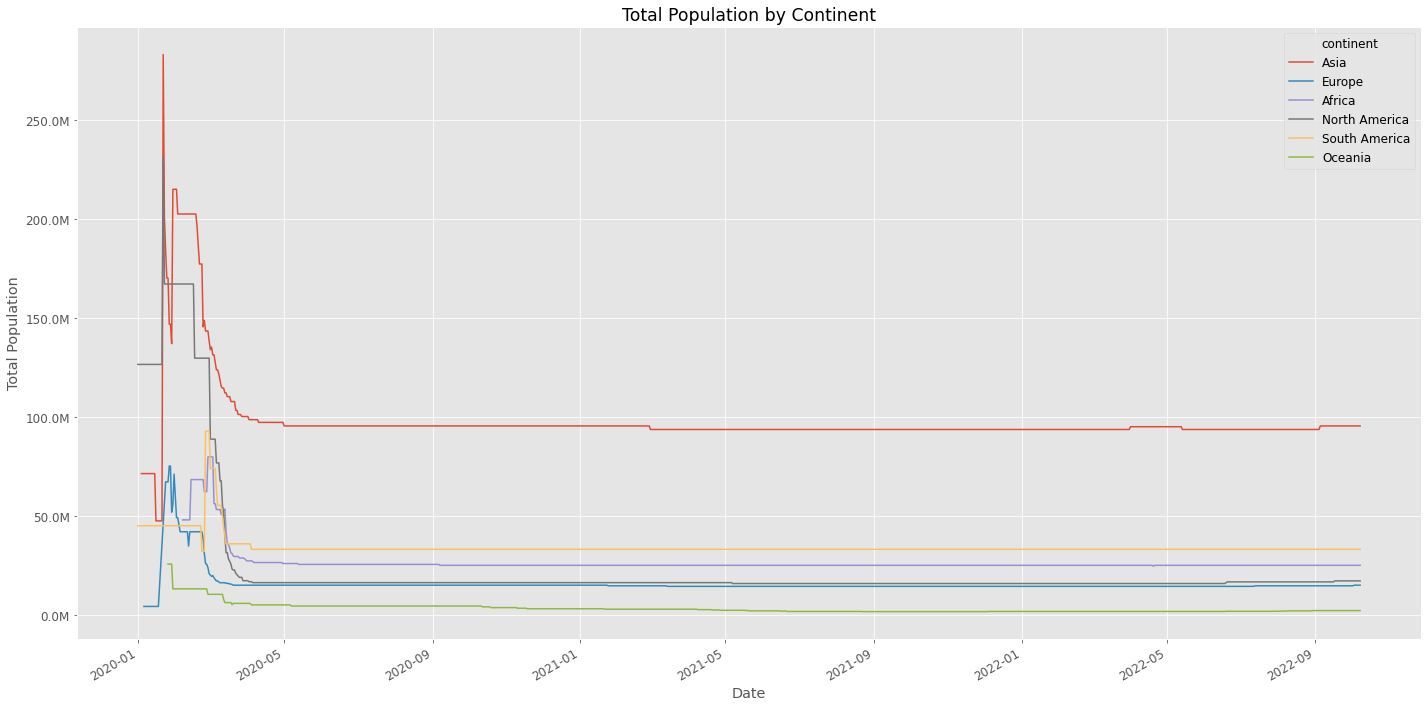

In [93]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

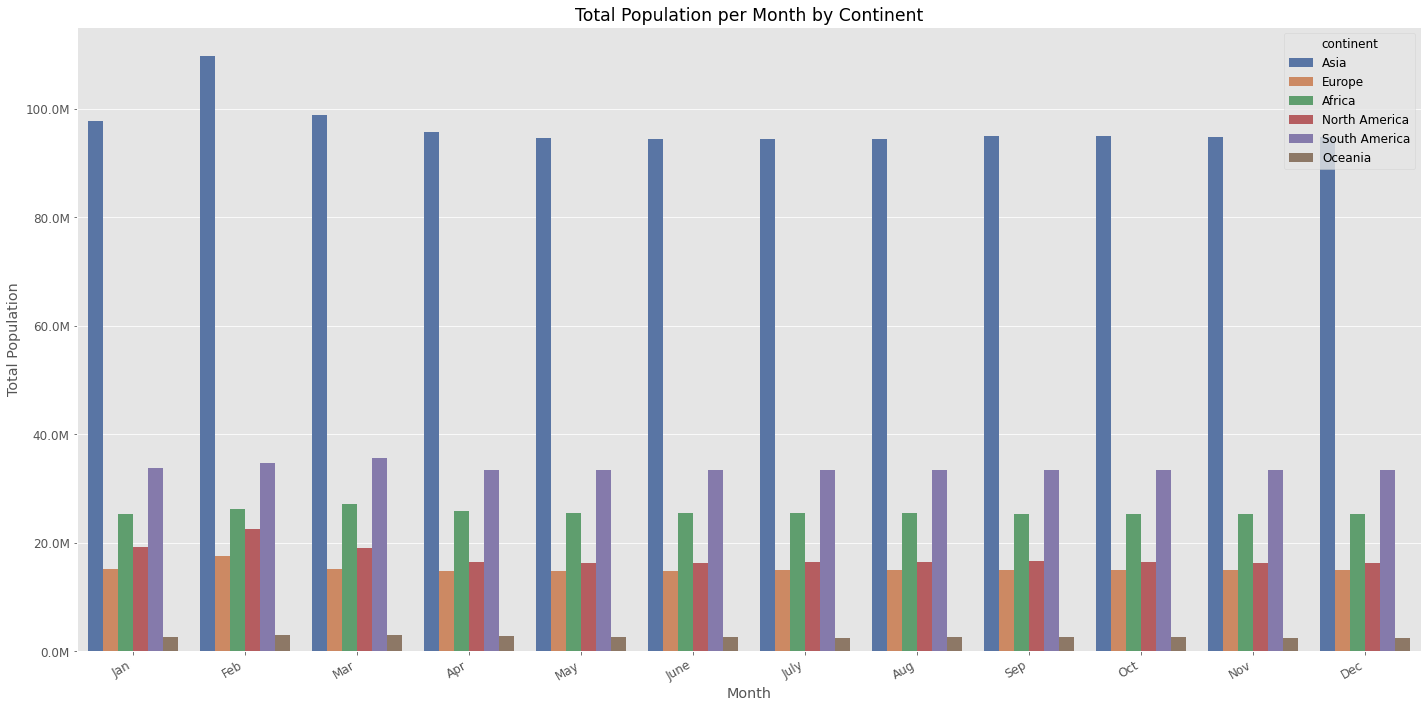

In [94]:
plot_bar(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='deep',
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

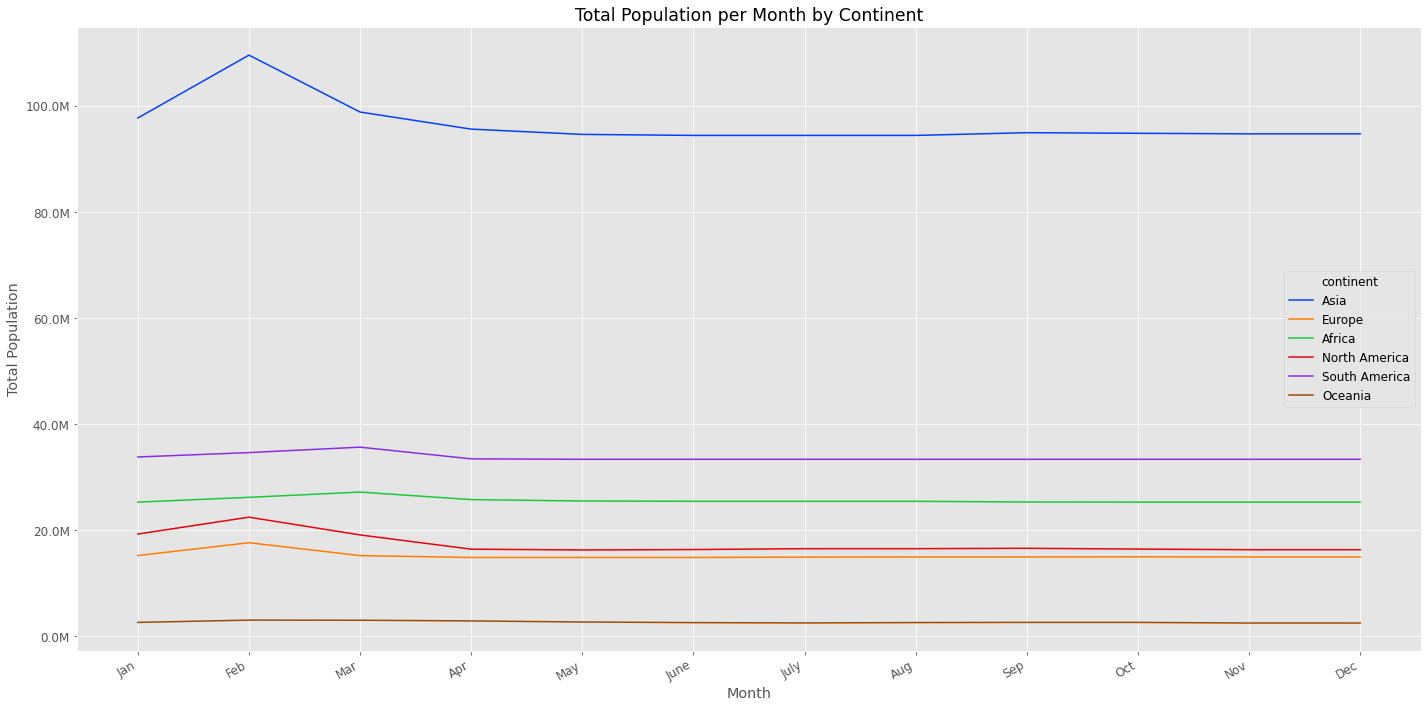

In [95]:
plot_line(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='bright', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

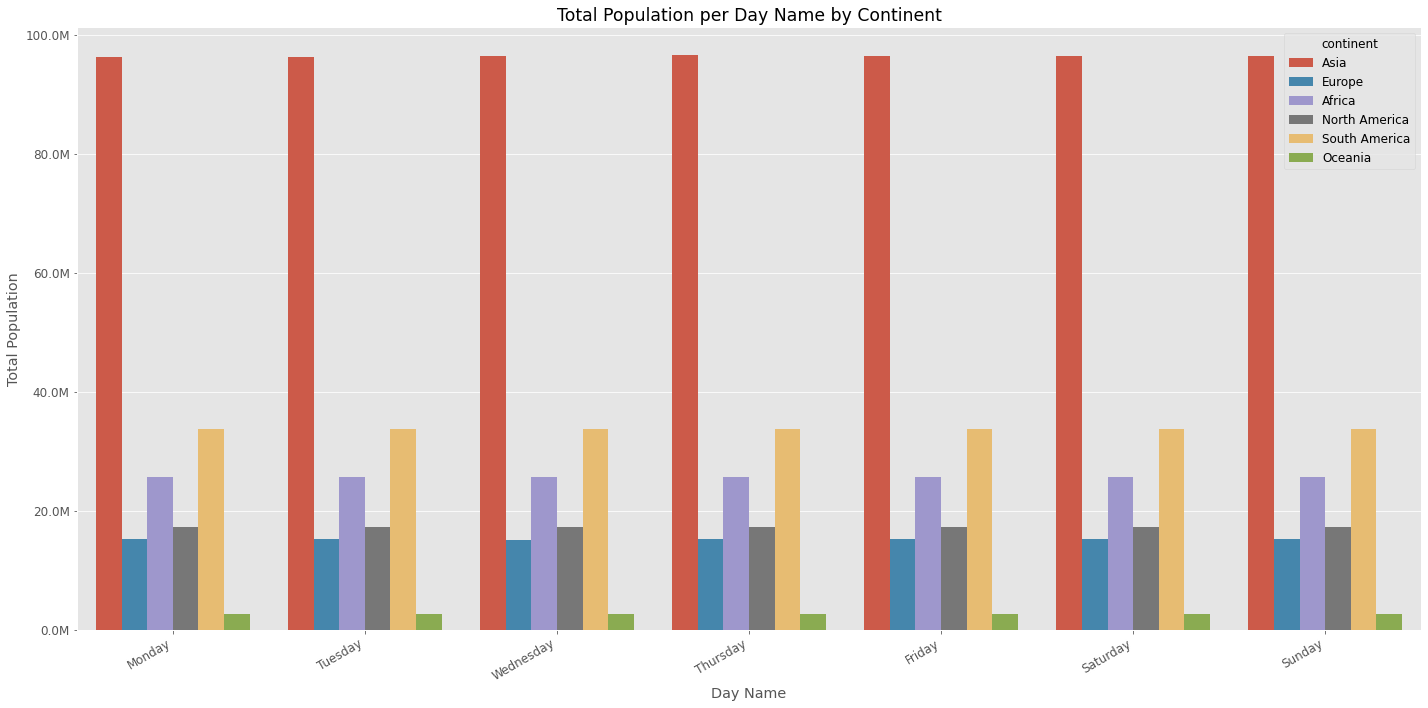

In [96]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

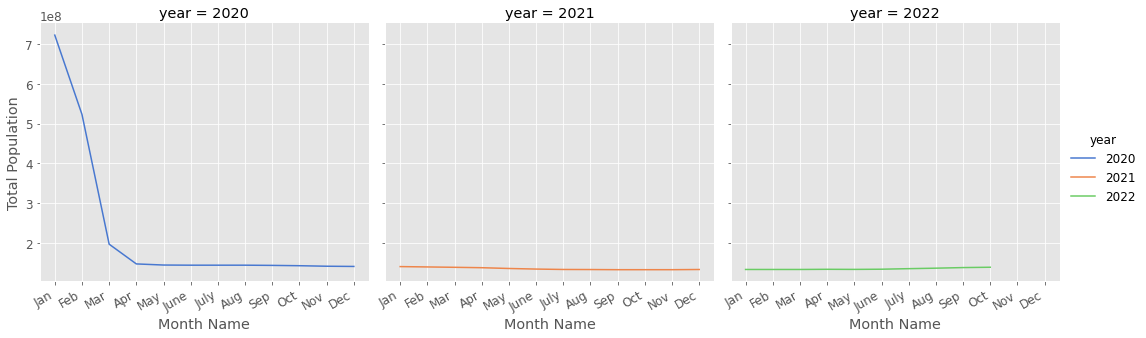

In [97]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

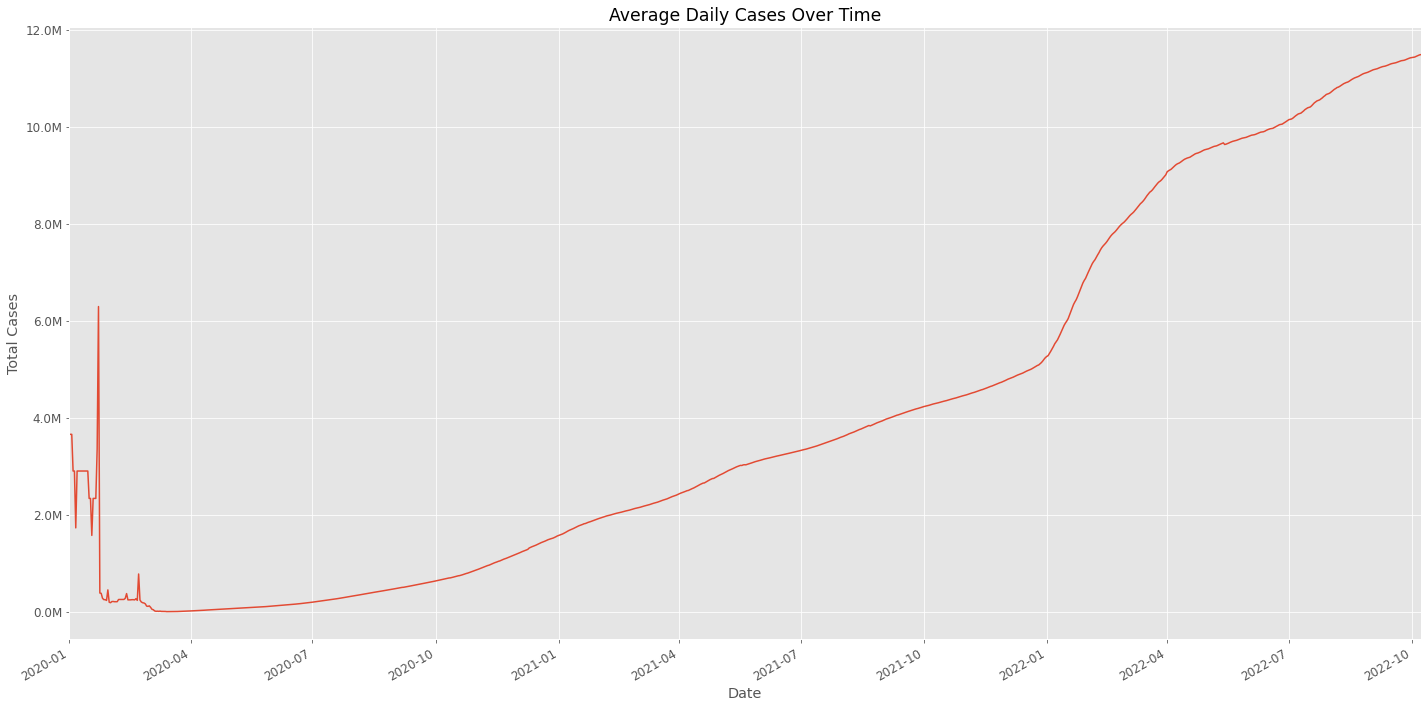

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

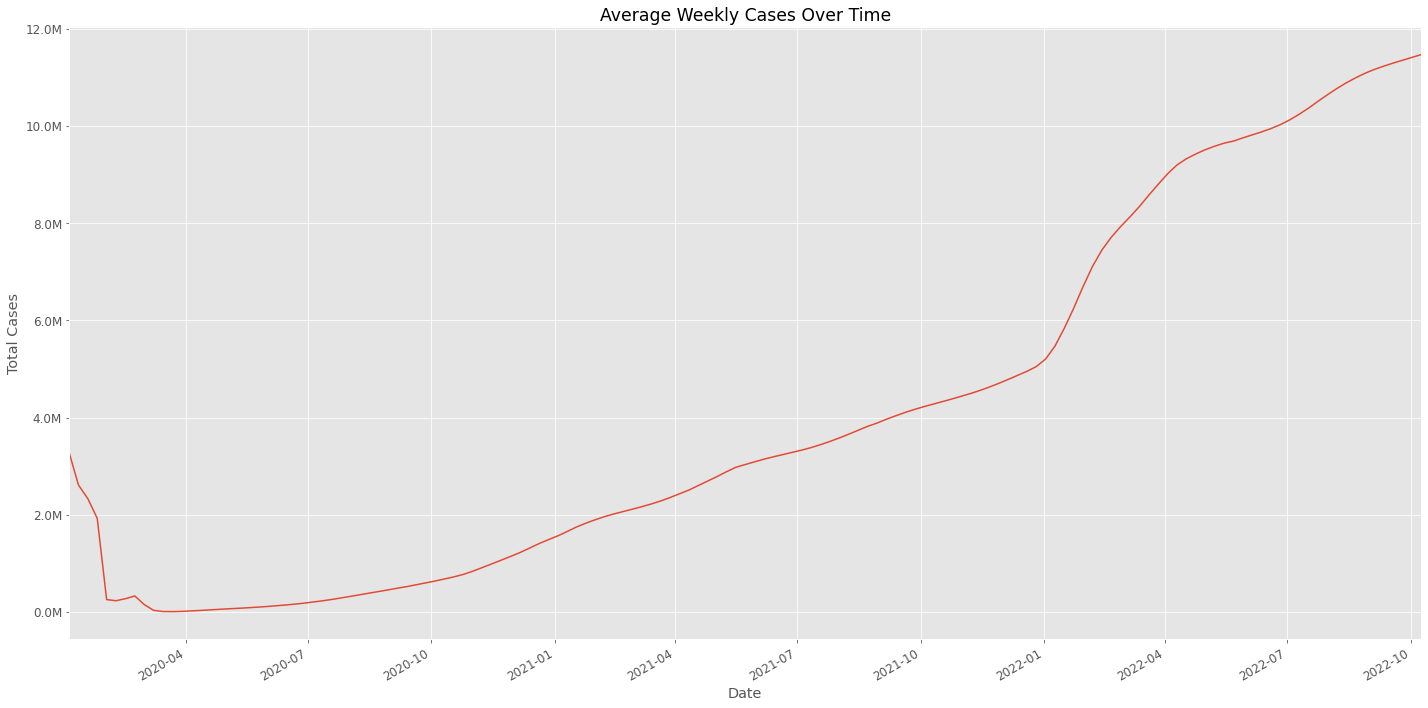

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

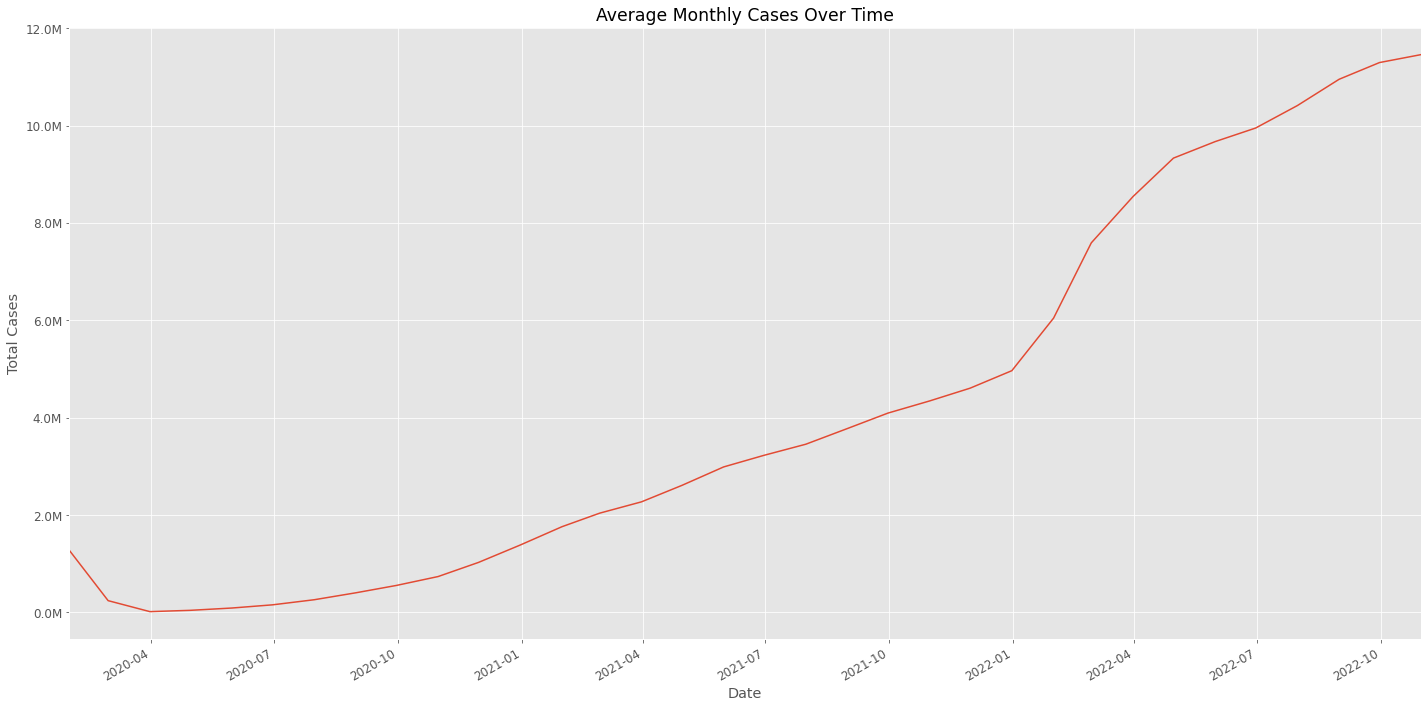

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

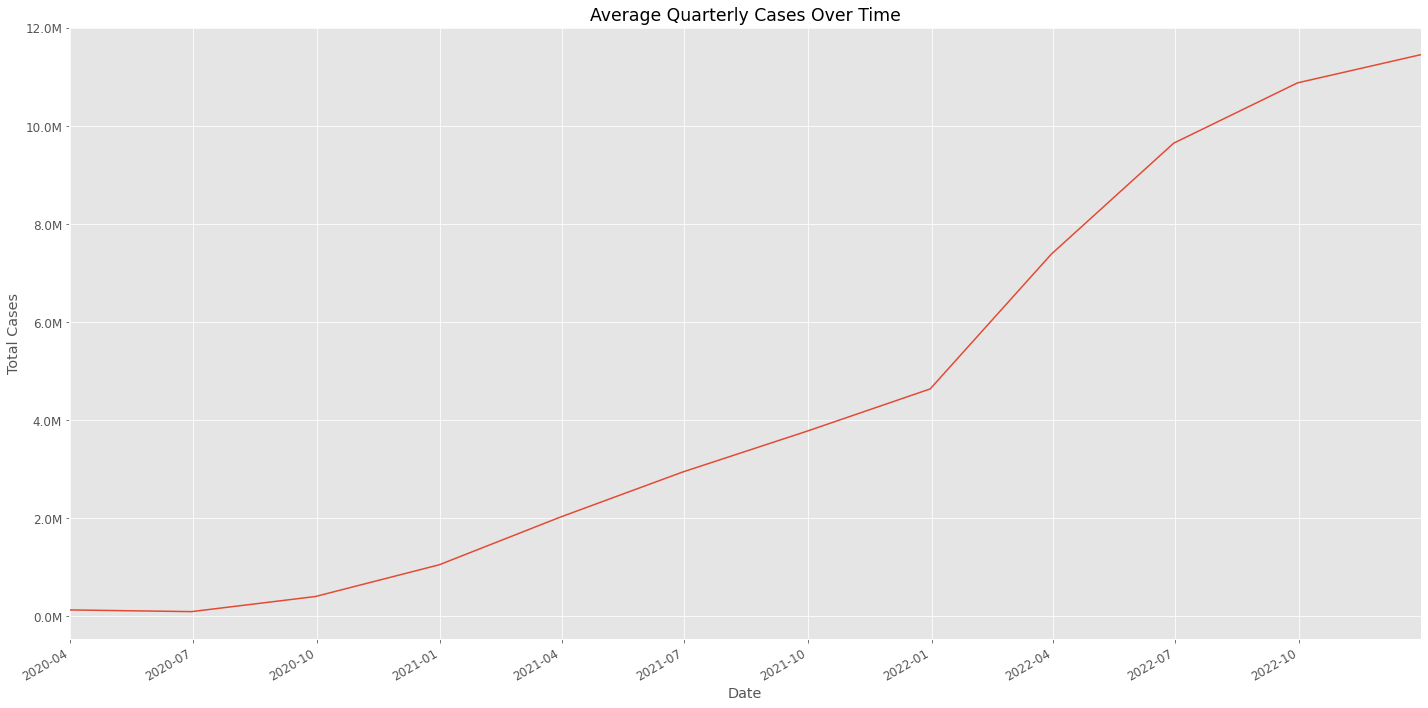

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

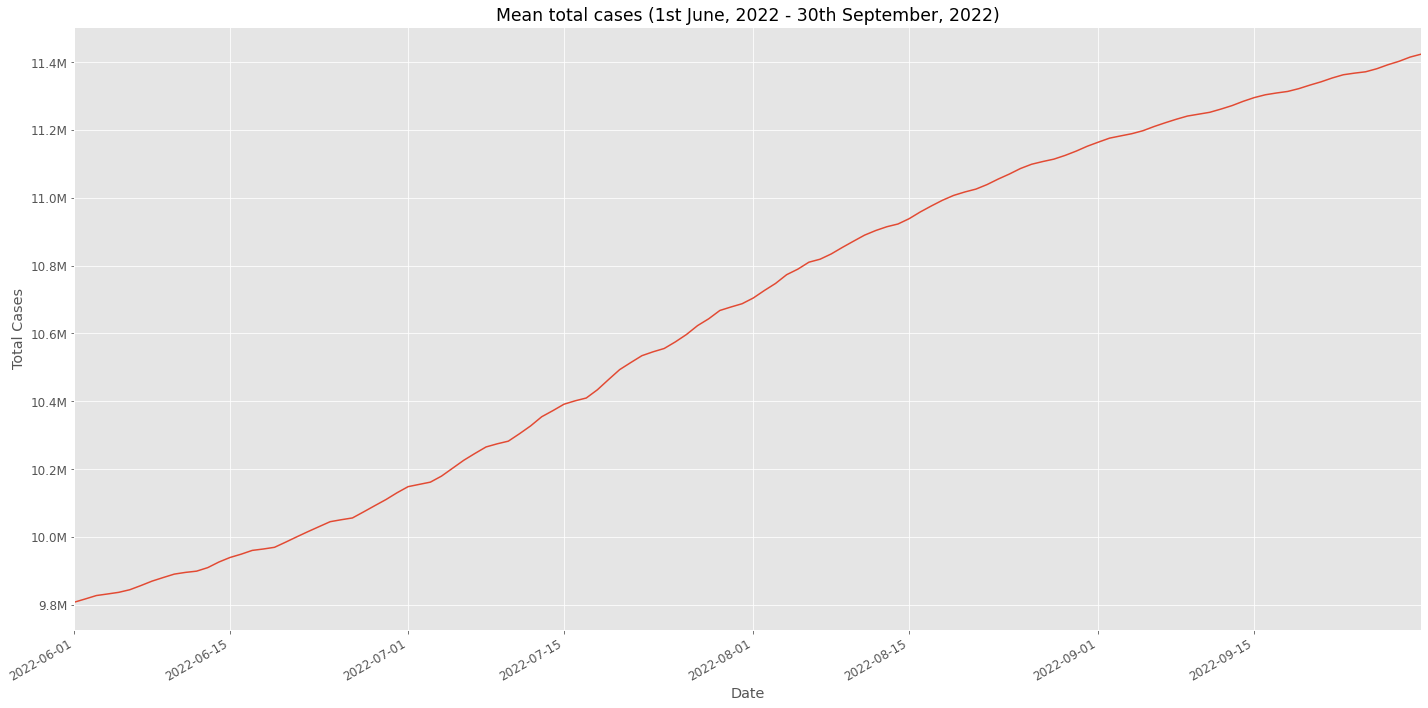

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-06-01', after='2022-09-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st June, 2022 - 30th September, 2022)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

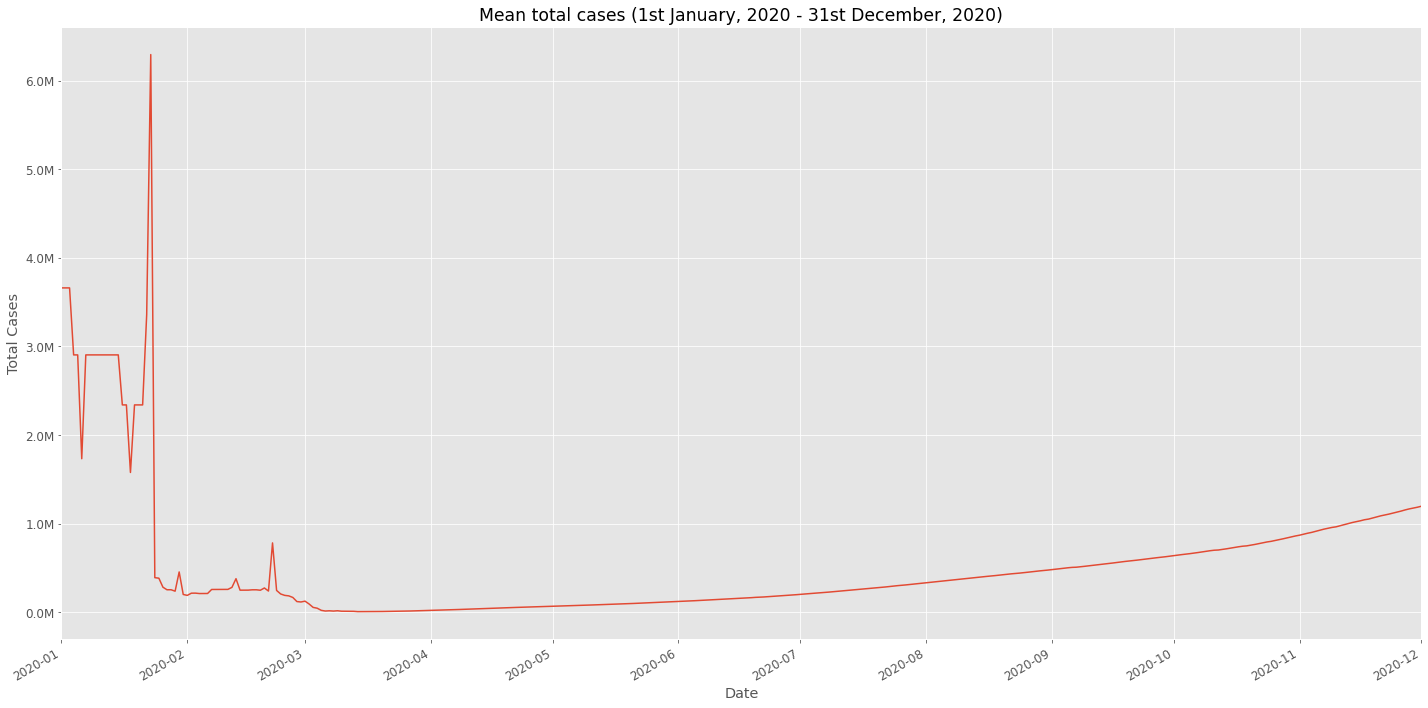

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

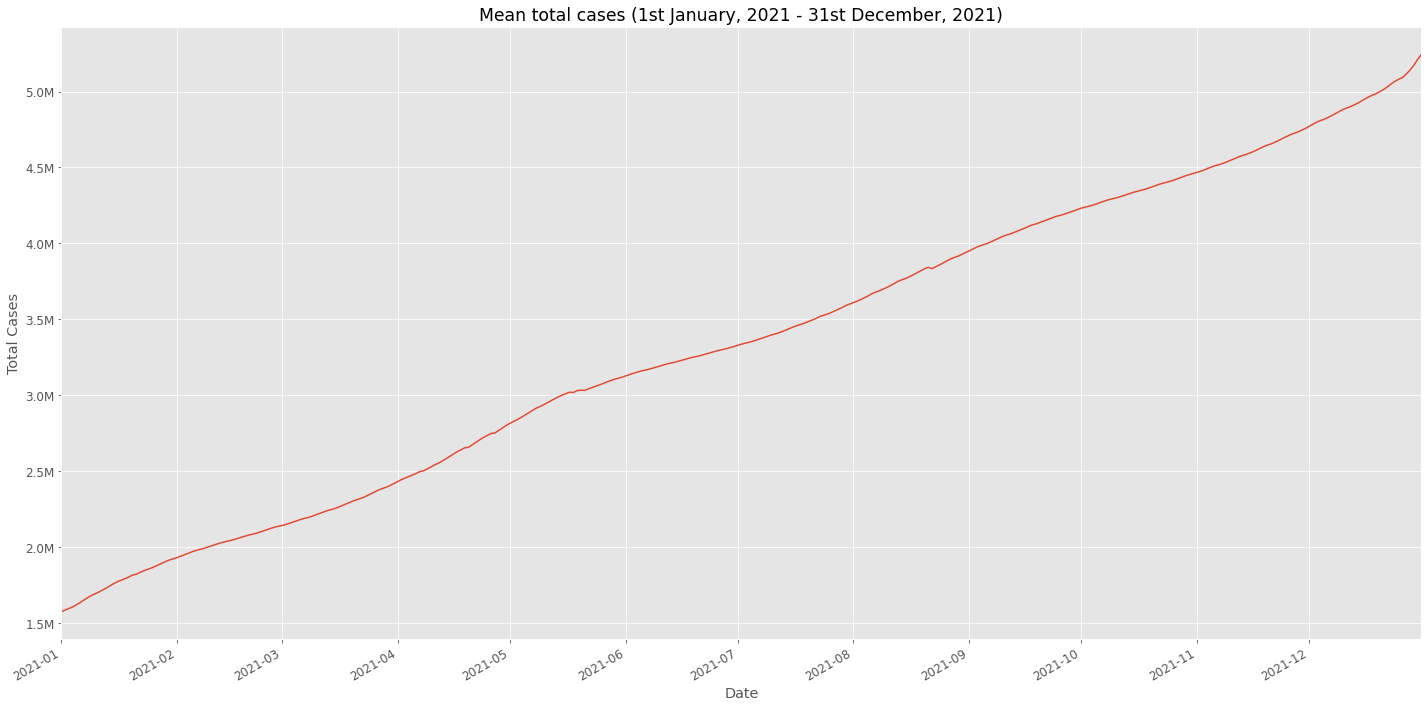

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

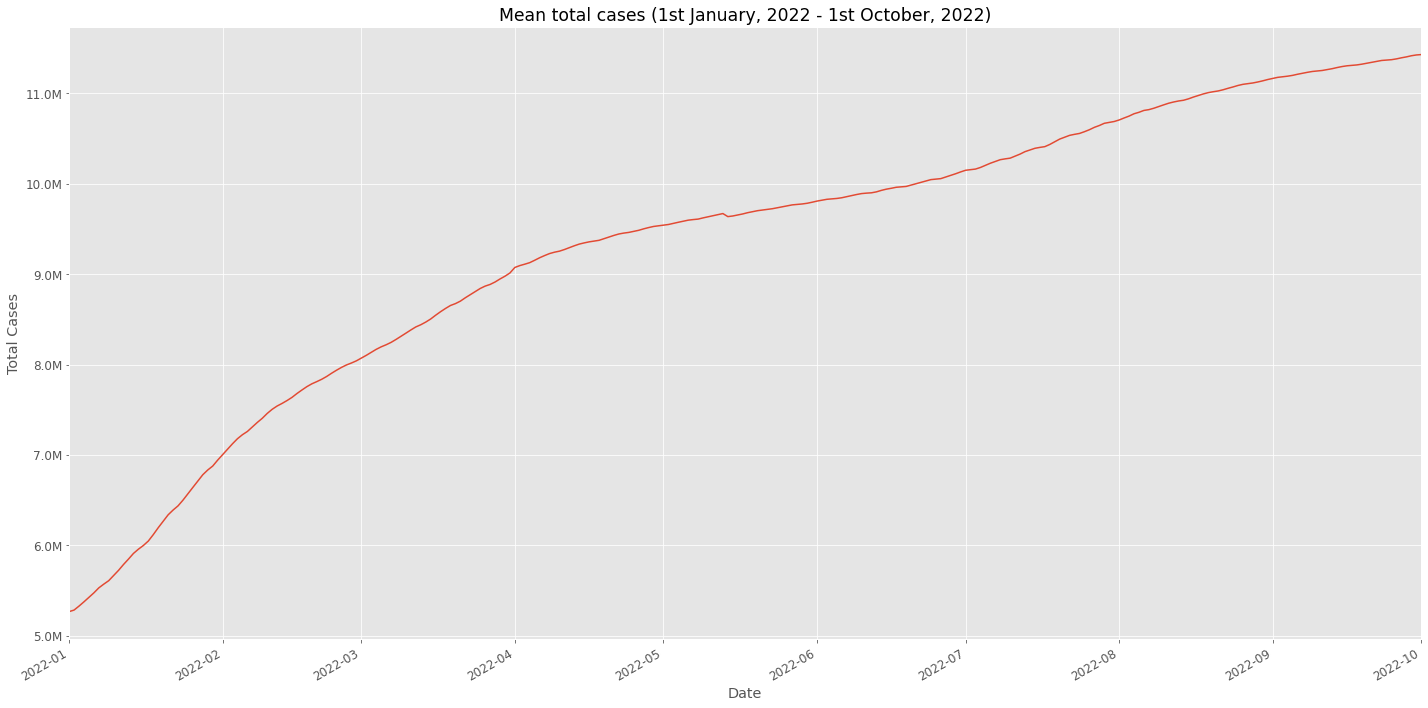

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-10-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st October, 2022)',
    formatter=format_mill
)